In [49]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(patchwork)
library(readxl)


# EDA

## Data

In [50]:
dataactor <- read_excel("data/pelaku.xlsx")

In [51]:
colnames(dataactor)

[1] "Timestamp"                                                                                                                                                                                                                        
  [2] "Name"                                                                                                                                                                                                                             
  [3] "Gender"                                                                                                                                                                                                                           
  [4] "Level of Education"                                                                                                                                                                                                               
  [5] "Major/Background"                                                                                                                                                                                                                 
  [6] "Location/Address"                                                                                                                                                                                                                 
  [7] "City"                                                                                                                                                                                                                             
  [8] "Province"                                                                                                                                                                                                                         
  [9] "Types of Shop"                                                                                                                                                                                                                    
 [10] "Time of Employment (Year)"                                                                                                                                                                                                        
 [11] "Time of Employment (Month)"                                                                                                                                                                                                       
 [12] "Contact HP/Email"                                                                                                                                                                                                                 
 [13] "1. What is your status in this street vendor business?"                                                                                                                                                                           
 [14] "2. Is this business venture a joint venture or own capital?"                                                                                                                                                                      
 [15] "3. Does your business have a business license/legality?"                                                                                                                                                                          
 [16] "4. Does the product being sold have a distribution permit?"                                                                                                                                                                       
 [17] "5. Is there anyone in charge of this business operation?"                                                                                                                                                                         
 [18] "6. Is anyone resp

In [52]:
unique(dataactor$`Types of Shop`)

[1] "Food"                                                     
 [2] "Culinary"                                                 
 [3] "Food Outlets"                                             
 [4] "grocery store"                                            
 [5] "Teh bohay kuliner"                                        
 [6] "Warong"                                                   
 [7] "Finished Food"                                            
 [8] "Dry food"                                                 
 [9] "Food stalls"                                              
[10] "Stall"                                                    
[11] "Roadside carts"                                           
[12] "Merhaba Kebab"                                            
[13] "Warung Lotek Bu Esih"                                     
[14] "Juragan pempek"                                           
[15] "Warung Sate Kardjan"                                      
[16] "Mie baso sakum"                                           
[17] "Bebek Garang"                                             
[18] "B & JO Banana Crispy dan Pisang Lilit"                    
[19] "Ayam Geprek"                                              
[20] "FnB"                                                      
[21] "Street food"                                              
[22] "Rombong Baso Goreng Lembang"                              
[23] "Warung Makan \"Gudeg Pas Enak\""                          
[24] "Ruko nasgor"                                              
[25] "Kuliner Baso Tahu"                                        
[26] "Warung Sate Maranggi Purwakarta"                          
[27] "Seafood"                                                  
[28] "Belut sawah"                                              
[29] "Tahu gimbal"                                              
[30] "Warung Bakso \"Marem\""                                   
[31] "Warung Nasi Gudeg \"Mbak Sri\""                           
[32] "Pancong lumer 99"                                         
[33] "Rombong soto lamongab"                                    
[34] "Jagung Manis Mozarella \"Ngaduk\""                        
[35] "Thai tea dan sosil telur"                                 
[36] "Leker Crepes Family"                                      
[37] "Warung Al Hikmah"                                         
[38] "Kebab"                                                    
[39] "Evening Culinary"                                         
[40] "Pasar Gede Lt.2 Solo"                                     
[41] "Warung  \"Lele Melet\""                                   
[42] "Brawijaya Steak"                                          
[43] "Warung Makanan cepat saji (matengan) Pak Man Gunung Kidul"
[44] "Warung Steak and Shake"

## SocioDemographic

In [5]:
# Gender
table(dataactor$Gender)

# Create a standardized education category
library(tidyverse)
library(ggplot2)

dataactor$Edu <- factor(
  case_when(
    dataactor$`Level of Education` %in% c("Primary School", "Junior HS", "Senior HS") ~ "Basic Education",
    dataactor$`Level of Education` %in% c("Vocational School", "3y Diploma") ~ "Vocational",
    dataactor$`Level of Education` %in% c("Bachelor", "Bachelor Adm Negara", "Master Degre") ~ "College Degree",
    TRUE ~ "Other"
  ),
  levels = c("Basic Education", "Vocational", "College Degree"),
  ordered = TRUE
)
table(dataactor$Edu)

# Province
dataactor$Province <- recode(dataactor$Province,
                              "Dki Jakarta" = "Jakarta",
                              "DKI Jakarta" = "Jakarta",
                              "DIY" = "Central Java",
                              "Jawa Tengah" = "Central Java",
                              "Jawa Barat" = "West Java")
table(dataactor$Province)


Female   Male 
    26     24 

Warning message:
"package 'forcats' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Basic Education      Vocational  College Degree 
             28              13               9 


Central Java      Jakarta    West Java 
          20           10           20 

In [6]:
#| echo: false
#| output: false

sum(is.na(dataactor$`Time of Employment (Year)`))

[1] 10

Idea:

Gender and Edu with pie
Province with SHP File (MAP)

Socio demographic data can use for calculating the weight of the data if number population is known.

## Ownership

In [7]:

dataactor$`1. What is your status in this street vendor business?`
dataactor$`2. Is this business venture a joint venture or own capital?`
dataactor$`3. Does your business have a business license/legality?`
dataactor$`4. Does the product being sold have a distribution permit?`

[1] "Owner"    "Owner"    "Employee" "Owner"    "Owner"    "Owner"   
 [7] "Owner"    "Owner"    "Owner"    "Owner"    "Owner"    "Employee"
[13] "Employee" "Employee" "Employee" "Owner"    "Employee" "Owner"   
[19] "Employee" "Employee" "Employee" "Owner"    "Owner"    "Employee"
[25] "Employee" "Owner"    "Employee" "Employee" "Owner"    "Employee"
[31] "Employee" "Owner"    "Owner"    "Employee" "Owner"    "Owner"   
[37] "Owner"    "Owner"    "Owner"    "Owner"    "Owner"    "Owner"   
[43] "Owner"    "Employee" "Owner"    "Owner"    "Employee" "Employee"
[49] "Owner"    "Employee"

[1] "Own capital"    "Own capital"    "Joint ventures" "Own capital"   
 [5] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
 [9] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[13] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[17] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[21] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[25] "Joint ventures" "Own capital"    "Own capital"    "Own capital"   
[29] "Joint ventures" "Own capital"    "Joint ventures" "Own capital"   
[33] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[37] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[41] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[45] "Own capital"    "Own capital"    "Joint ventures" "Joint ventures"
[49] "Own capital"    "Own capital"

[1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[25] "Yes" "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes"
[49] "No"  "Yes"

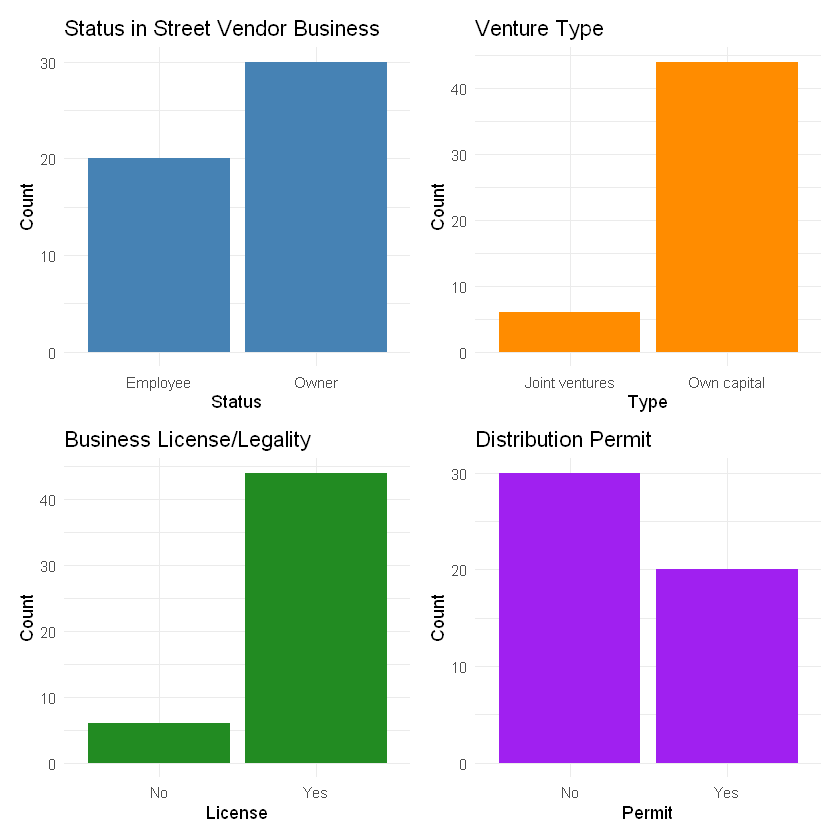

In [8]:
# Basix bar plot for q1-q4
q1 <- ggplot(dataactor, aes(x = `1. What is your status in this street vendor business?`)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Status in Street Vendor Business", x = "Status", y = "Count") +
  theme_minimal()
q2 <- ggplot(dataactor, aes(x = `2. Is this business venture a joint venture or own capital?`)) +
       geom_bar(fill = "darkorange") +
       labs(title = "Venture Type", x = "Type", y = "Count") +
       theme_minimal()

q3 <- ggplot(dataactor, aes(x = `3. Does your business have a business license/legality?`)) +
       geom_bar(fill = "forestgreen") +
       labs(title = "Business License/Legality", x = "License", y = "Count") +
       theme_minimal()

q4 <- ggplot(dataactor, aes(x = `4. Does the product being sold have a distribution permit?`)) +
       geom_bar(fill = "purple") +
       labs(title = "Distribution Permit", x = "Permit", y = "Count") +
       theme_minimal()

# Display plots side by side
(q1 | q2) /
(q3 | q4)

## Leadership

In [9]:
dataactor$`5. Is there anyone in charge of this business operation?`
dataactor$`6. Is anyone responsible for the quality and safety of the food sold/produced?`
dataactor$`7. Is anyone responsible as suppliers for raw materials?`
dataactor$`8. Are there quality guidelines and procedures related to food safety in the business?`
dataactor$`9. Are there any provisions regarding raw materials and products that are not suitable for use or sale?`

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes"
[13] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

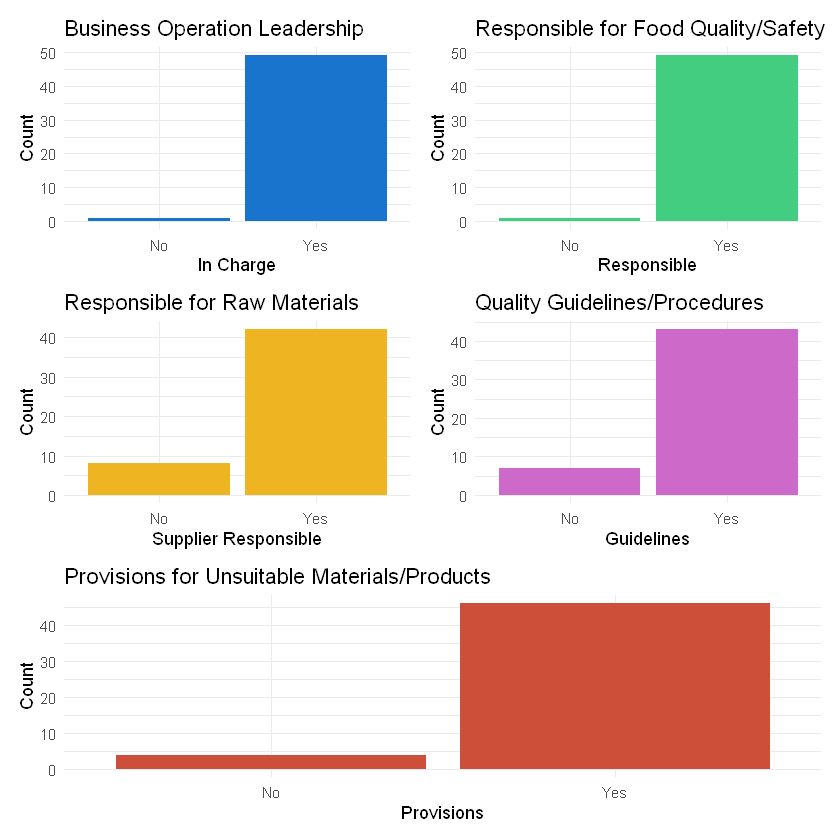

In [10]:
# Basic bar plots for leadership questions (q5-q9)
q5 <- ggplot(dataactor, aes(x = `5. Is there anyone in charge of this business operation?`)) +
    geom_bar(fill = "dodgerblue3") +
    labs(title = "Business Operation Leadership", x = "In Charge", y = "Count") +
    theme_minimal()

q6 <- ggplot(dataactor, aes(x = `6. Is anyone responsible for the quality and safety of the food sold/produced?`)) +
    geom_bar(fill = "seagreen3") +
    labs(title = "Responsible for Food Quality/Safety", x = "Responsible", y = "Count") +
    theme_minimal()

q7 <- ggplot(dataactor, aes(x = `7. Is anyone responsible as suppliers for raw materials?`)) +
    geom_bar(fill = "goldenrod2") +
    labs(title = "Responsible for Raw Materials", x = "Supplier Responsible", y = "Count") +
    theme_minimal()

q8 <- ggplot(dataactor, aes(x = `8. Are there quality guidelines and procedures related to food safety in the business?`)) +
    geom_bar(fill = "orchid3") +
    labs(title = "Quality Guidelines/Procedures", x = "Guidelines", y = "Count") +
    theme_minimal()

q9 <- ggplot(dataactor, aes(x = `9. Are there any provisions regarding raw materials and products that are not suitable for use or sale?`)) +
    geom_bar(fill = "tomato3") +
    labs(title = "Provisions for Unsuitable Materials/Products", x = "Provisions", y = "Count") +
    theme_minimal()

# Display plots in a grid
((q5 | q6) / (q7 | q8)) / q9

## Planning

In [11]:
dataactor$`10. While working with food, do you pay attention to matters related to the cleanliness of the food (food safety) that is sold or produced?`
dataactor$`11. Does your business follow up the customer feedback for improvement?`
dataactor$`12. Does your business conduct annual or periodic evaluations?`

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No" 
[25] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes"
[49] "Yes" "Yes"

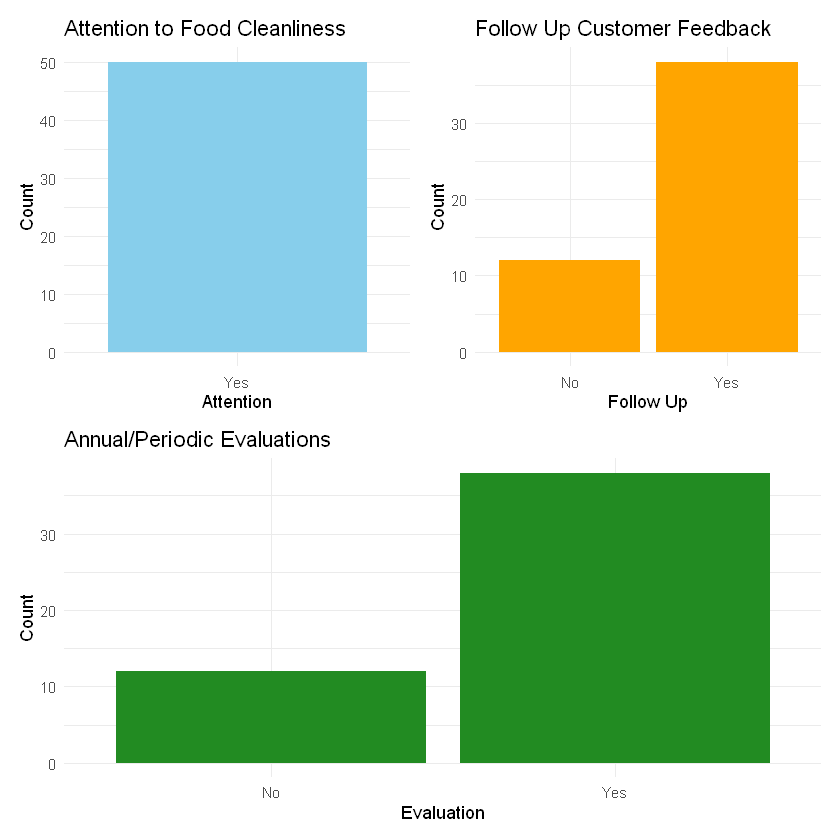

In [12]:
# Basic bar plots for planning questions (q10-q12)
q10 <- ggplot(dataactor, aes(x = `10. While working with food, do you pay attention to matters related to the cleanliness of the food (food safety) that is sold or produced?`)) +
    geom_bar(fill = "skyblue") +
    labs(title = "Attention to Food Cleanliness", x = "Attention", y = "Count") +
    theme_minimal()

q11 <- ggplot(dataactor, aes(x = `11. Does your business follow up the customer feedback for improvement?`)) +
    geom_bar(fill = "orange") +
    labs(title = "Follow Up Customer Feedback", x = "Follow Up", y = "Count") +
    theme_minimal()

q12 <- ggplot(dataactor, aes(x = `12. Does your business conduct annual or periodic evaluations?`)) +
    geom_bar(fill = "forestgreen") +
    labs(title = "Annual/Periodic Evaluations", x = "Evaluation", y = "Count") +
    theme_minimal()

# Display plots side by side
(q10 | q11) / q12

## Human resources

[1] 25

[1] 36

$`13. Is this business run by workers with relevant experience or skills?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`14. What types of attributes do food processing workers use while working? (Choose the answers that suit you the best (you may choose more than one)`
 [1] "head cover, Mask, Gloves, Apron/apron"        
 [2] "Glove"                                        
 [3] "head cover, Mask, Gloves, Apron/apron"        
 [4] "head cover, Mask, Gloves, Apron/apron"        
 [5] "Apron/apron"                                  
 [6] "head cover, Mask, Gloves, Apron/apron, Others"
 [7] "head cover, Mask, Gloves, Apron/apron, Others"
 [8] "Gloves, Apron/Apron"                          
 [9] "Masks, Gloves, Aprons/aprons"                 
[10] "Masks, Gloves, More"                          
[11] "Masks, Gloves"                                
[12] "head cover, Gloves, Apron/apron"              
[13] "Other"                                        
[14] "Glove"                                        
[15] "Masks, Gloves"                                
[16] "head cover, Apron/apron"                      
[17] "Glove"                                        
[18] "Apron/apron"                                  
[19] "Apron/apron"                                  
[20] "Apron/apron"                                  
[21] "head cover, Gloves, Apron/apron"              
[22] "Gloves, Apron/Apron"                          
[23] "head cover, Mask, Gloves, Apron/apron"        
[24] "Gloves, Apron/Apron"                          
[25] "Apron/apron"                                  
[26] "Gloves, Apron/Apron"                          
[27] "head cover, Mask, Gloves"                     
[28] "Apron/apron"                                  
[29] "Apron/apron"                                  
[30] "head cover, Gloves"                           
[31] "Head cover"                                   
[32] "head cover, Gloves, Apron/apron"              
[33] "Apron/apron"                                  
[34] "head cover, Mask, Apron/apron"                
[35] "Mask, Apron/Apron"                            
[36] "head cover, Apron/apron"                      
[37] "Gloves, Apron/Apron"                          
[38] "Gloves, Apron/Apron"                          
[39] "Glove"                                        
[40] "Glove"                                        
[41] "Other"                                        
[42] "Head cover"                                   
[43] "Other"                                        
[44] "head cover, Gloves"                           
[45] "Other"                                        
[46] "Other"                                        
[47] "Glove"                                        
[48] "Glove"                                        
[49] "Other"                                        
[50] "head cover, Apron/apron"

$`If the answer to the previous question (Question 14) is "Other", please specify`
 [1] NA                                                           
 [2] NA                                                           
 [3] NA                                                           
 [4] NA                                                           
 [5] NA                                                           
 [6] "Shoe"                                                       
 [7] "Shoe"                                                       
 [8] NA                                                           
 [9] NA                                                           
[10] "None"                                                       
[11] "None"                                                       
[12] NA                                                           
[13] "Organized by the Floating Market Manager"                   
[14] NA                                                           
[15] NA                                                           
[16] "Don't wash your gloves because you have to wash your hands."
[17] NA                                                           
[18] NA                                                           
[19] NA                                                           
[20] NA                                                           
[21] NA                                                           
[22] NA                                                           
[23] NA                                                           
[24] NA                                                           
[25] NA                                                           
[26] NA                                                           
[27] NA                                                           
[28] NA                                                           
[29] NA                                                           
[30] NA                                                           
[31] NA                                                           
[32] NA                                                           
[33] NA                                                           
[34] "Mask when unhealthy"                                        
[35] NA                                                           
[36] NA                                                           
[37] NA                                                           
[38] NA                                                           
[39] NA                                                           
[40] NA                                                           
[41] "Does not require the use of the above"                      
[42] NA                                                           
[43] NA                                                           
[44] NA                                                           
[45] "Hat"                                                        
[46] "Always wash your hands"                                     
[47] NA                                                           
[48] NA                                                           
[49] "Does not require the use of the above"                      
[50] NA

$`15. Are workers allowed to smoke/vape during food preparation or handling?`
 [1] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
[13] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "No" 
[25] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
[37] "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "No" 
[49] "No"  "No"

$`16. Do workers who handle food wash their hands before working?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`17.  Do workers change clothes before work or wear special working attire?`
 [1] "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes"
[13] "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[25] "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No" 
[49] "No"  "Yes"

$`18. Do workers who work must be in good health?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`19. Are there any provisions for periodic health checks for workers?`
 [1] "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[13] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "No" 
[25] "Yes" "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "No"

$`20. Does this business have employees who work specifically as cashiers?`
 [1] "No"  "No"  "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes"
[13] "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[49] "No"  "Yes"

$`21. Is the cashier allowed to do food processing?`
 [1] "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "No" 
[13] "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No" 
[25] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "No"

$`22. Do workers have knowledge about food storage temperatures (meat, fish, vegetables and other ingredients)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`23. Is there any prohibition for workers who process food to wear jewelry, watches, brooches and others?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "No" 
[13] "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes" "No" 
[25] "No"  "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

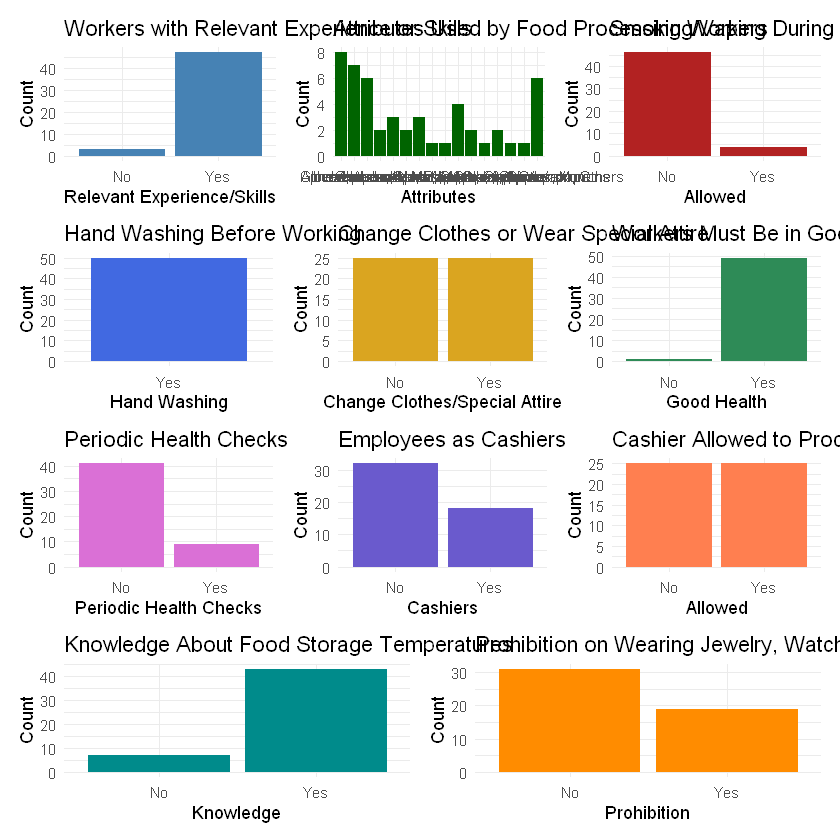

In [13]:
# Find column position for question 13 and 23
which(colnames(dataactor) == "13. Is this business run by workers with relevant experience or skills?")
which(colnames(dataactor) == "23. Is there any prohibition for workers who process food to wear jewelry, watches, brooches and others?")   

c(dataactor[,25])
c(dataactor[,26])
c(dataactor[,27])
c(dataactor[,28])
c(dataactor[,29])
c(dataactor[,30])
c(dataactor[,31])
c(dataactor[,32])
c(dataactor[,33])
c(dataactor[,34])   
c(dataactor[,35])
c(dataactor[,36])

# Bar plot for question 13: Relevant experience or skills
q13 <- ggplot(dataactor, aes(x = `13. Is this business run by workers with relevant experience or skills?`)) +
    geom_bar(fill = "steelblue") +
    labs(title = "Workers with Relevant Experience or Skills", x = "Relevant Experience/Skills", y = "Count") +
    theme_minimal()

# Bar plot for question 14: Types of attributes used by workers
q14 <- ggplot(dataactor, aes(x = `14. What types of attributes do food processing workers use while working? (Choose the answers that suit you the best (you may choose more than one)`)) +
    geom_bar(fill = "darkgreen") +
    labs(title = "Attributes Used by Food Processing Workers", x = "Attributes", y = "Count") +
    theme_minimal()

# Bar plot for question 15: Smoking/vaping during food preparation
q15 <- ggplot(dataactor, aes(x = `15. Are workers allowed to smoke/vape during food preparation or handling?`)) +
    geom_bar(fill = "firebrick") +
    labs(title = "Smoking/Vaping During Food Preparation", x = "Allowed", y = "Count") +
    theme_minimal()

# Bar plot for question 16: Hand washing before working
q16 <- ggplot(dataactor, aes(x = `16. Do workers who handle food wash their hands before working?`)) +
    geom_bar(fill = "royalblue") +
    labs(title = "Hand Washing Before Working", x = "Hand Washing", y = "Count") +
    theme_minimal()

# Bar plot for question 17: Change clothes or wear special attire
q17 <- ggplot(dataactor, aes(x = `17.  Do workers change clothes before work or wear special working attire?`)) +
    geom_bar(fill = "goldenrod") +
    labs(title = "Change Clothes or Wear Special Attire", x = "Change Clothes/Special Attire", y = "Count") +
    theme_minimal()

# Bar plot for question 18: Workers must be in good health
q18 <- ggplot(dataactor, aes(x = `18. Do workers who work must be in good health?`)) +
    geom_bar(fill = "seagreen") +
    labs(title = "Workers Must Be in Good Health", x = "Good Health", y = "Count") +
    theme_minimal()

# Bar plot for question 19: Periodic health checks
q19 <- ggplot(dataactor, aes(x = `19. Are there any provisions for periodic health checks for workers?`)) +
    geom_bar(fill = "orchid") +
    labs(title = "Periodic Health Checks", x = "Periodic Health Checks", y = "Count") +
    theme_minimal()

# Bar plot for question 20: Employees as cashiers
q20 <- ggplot(dataactor, aes(x = `20. Does this business have employees who work specifically as cashiers?`)) +
    geom_bar(fill = "slateblue") +
    labs(title = "Employees as Cashiers", x = "Cashiers", y = "Count") +
    theme_minimal()

# Bar plot for question 21: Cashier allowed to process food
q21 <- ggplot(dataactor, aes(x = `21. Is the cashier allowed to do food processing?`)) +
    geom_bar(fill = "coral") +
    labs(title = "Cashier Allowed to Process Food", x = "Allowed", y = "Count") +
    theme_minimal()

# Bar plot for question 22: Knowledge about food storage temperatures
q22 <- ggplot(dataactor, aes(x = `22. Do workers have knowledge about food storage temperatures (meat, fish, vegetables and other ingredients)?`)) +
    geom_bar(fill = "darkcyan") +
    labs(title = "Knowledge About Food Storage Temperatures", x = "Knowledge", y = "Count") +
    theme_minimal()

# Bar plot for question 23: Prohibition on jewelry, watches, etc.
q23 <- ggplot(dataactor, aes(x = `23. Is there any prohibition for workers who process food to wear jewelry, watches, brooches and others?`)) +
    geom_bar(fill = "darkorange") +
    labs(title = "Prohibition on Wearing Jewelry, Watches, etc.", x = "Prohibition", y = "Count") +
    theme_minimal()

# Display plots in a grid (adjust as needed)
(q13 | q14 | q15) /
(q16 | q17 | q18) /
(q19 | q20 | q21) /
(q22 | q23)


## Infrastructure and facilities

In [14]:
# find column position for question 50
which(colnames(dataactor) == "50. Are production tool/equipment/facilities regularly maintained?")

c(dataactor[, 37])
c(dataactor[, 38])
c(dataactor[, 39])
c(dataactor[, 40])
c(dataactor[, 41])
c(dataactor[, 42])
c(dataactor[, 43])
c(dataactor[, 44])
c(dataactor[, 45])
c(dataactor[, 46])
c(dataactor[, 47])
c(dataactor[, 48])
c(dataactor[, 49])
c(dataactor[, 50])
c(dataactor[, 51])
c(dataactor[, 52])
c(dataactor[, 53])
c(dataactor[, 54])
c(dataactor[, 55])
c(dataactor[, 56])
c(dataactor[, 57])
c(dataactor[, 58])
c(dataactor[, 59])
c(dataactor[, 60])
c(dataactor[, 61])
c(dataactor[, 62])
c(dataactor[, 63])
c(dataactor[, 64])
c(dataactor[, 65])

[1] 65

$`24. Does the business provide a place to wash hands?`
 [1] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`25. Does the business site provide handwash soap ?`
 [1] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`26. Are the floors and walls of the food processing area in good condition (clean, undamaged, easy to wash and disinfect)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`27. Is the tabletop for processing food in good condition (clean, undamaged, smooth surface, easy to wash and disinfect)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`28. Have you ever seen food pests (rats, insects) at your business location?`
 [1] "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No" 
[13] "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[25] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "Yes"
[49] "No"  "Yes"

$`29. Have you ever seen personal items (cell phones, bags) of workers in food processing areas?`
 [1] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No" 
[13] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No" 
[25] "No"  "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "No"

$`30. Are raw materials stored in good conditions (e.g., clean, covered, suitable temperatures)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`31. Is the food processing equipment in clean and good condition (determined visually)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`32. Are ready-to-eat products and trash bins placed separately?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`33. Is there a supervisor in the production/food processing area?`
 [1] "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes"
[13] NA    "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "No"  "Yes"

$`34. Are workers with injured hands not allowed to work?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes"
[13] "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "Yes"
[25] "No"  "Yes" "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "No" 
[37] "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[49] "No"  "Yes"

$`35. Should workers with long hair protect their hair to reduce the risk of food contamination?`
 [1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[37] "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

$`36. Do workers wash their hands frequently and properly (based on observation)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" NA    "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`37. Do workers wear and change disposable gloves?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes"
[49] "No"  "Yes"

$`38. Are workers prohibited from touching their face, hair, nose, or ears during food processing?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`39. Are closed display cases (containers) used to protect food from dust or pests?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`40. Does this business use different kitchen utensils (knives, cutting boards, etc.) for different types of food?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`41. Are there waste bins at the production site and at the service site?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`42. What is the waste collection schedule?`
 [1] "Other"     "Every day" "Every day" "Every day" "Every day" "Every day"
 [7] "Every day" "Other"     "Every day" "Every day" "Every day" "Every day"
[13] "Every day" "Every day" "Every day" "Other"     "Every day" "Every day"
[19] "Every day" "Every day" "Every day" "Other"     "Every day" "Every day"
[25] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[31] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[37] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[43] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[49] "Every day" "Every day"

$`If the answer to the previous question (Question 42) is "Other", please specify`
 [1] "Twice a week"                                                                                 
 [2] NA                                                                                             
 [3] NA                                                                                             
 [4] NA                                                                                             
 [5] NA                                                                                             
 [6] NA                                                                                             
 [7] NA                                                                                             
 [8] "3 x Week"                                                                                     
 [9] NA                                                                                             
[10] NA                                                                                             
[11] "None"                                                                                         
[12] "garbage is disposed of at the shelter, transported by garbage truck after the shelter is full"
[13] "a day can be several times"                                                                   
[14] NA                                                                                             
[15] NA                                                                                             
[16] "2-3 times a week"                                                                             
[17] NA                                                                                             
[18] NA                                                                                             
[19] NA                                                                                             
[20] NA                                                                                             
[21] NA                                                                                             
[22] "Once every 2 or 3 days"                                                                       
[23] NA                                                                                             
[24] "2 times a day"                                                                                
[25] NA                                                                                             
[26] NA                                                                                             
[27] NA                                                                                             
[28] NA                                                                                             
[29] NA                                                                                             
[30] NA                                                                                             
[31] NA                                                                                             
[32] NA                                                                                             
[33] NA                                                                                             
[34] NA                                                                                             
[35] NA                                                                                             
[36] NA                                                                                             
[37] NA                                                                                             
[38] NA                                                                                             
[39] NA                                                                        

$`43. Does this business have a refrigerator/freezer to store raw materials such as meat or fish?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`44. Does this business use disposable tableware?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[13] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "No" 
[37] "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No" 
[49] "Yes" "No"

$`45. How is the process of washing cutlery?`
 [1] "Using running water"     "Using running water"    
 [3] "Using running water"     "Using running water"    
 [5] "Using running water"     "Using running water"    
 [7] "Using running water"     "Using running water"    
 [9] "Using running water"     "Using running water"    
[11] "Using running water"     "Using running water"    
[13] "Other"                   "Using running water"    
[15] "Other"                   "Using water in a bucket"
[17] "Using running water"     "Other"                  
[19] "Using running water"     "Using running water"    
[21] "Using running water"     "Using running water"    
[23] "Using running water"     "Using running water"    
[25] "Using running water"     "Using running water"    
[27] "Using running water"     "Using running water"    
[29] "Using running water"     "Using running water"    
[31] "Using running water"     "Using running water"    
[33] "Using running water"     "Using running water"    
[35] "Using running water"     "Using running water"    
[37] "Using running water"     "Using running water"    
[39] "Using water in a bucket" "Using running water"    
[41] "Using water in a bucket" "Other"                  
[43] "Using running water"     "Only wiped"             
[45] "Using water in a bucket" "Using running water"    
[47] "Using running water"     "Using running water"    
[49] "Using running water"     "Using running water"

$`If the answer to the previous question (Question 45) is "Other", please specify`
 [1] NA                                                       
 [2] NA                                                       
 [3] NA                                                       
 [4] NA                                                       
 [5] NA                                                       
 [6] NA                                                       
 [7] NA                                                       
 [8] NA                                                       
 [9] NA                                                       
[10] NA                                                       
[11] NA                                                       
[12] NA                                                       
[13] "disposable tools"                                       
[14] NA                                                       
[15] "disposable cutlery, cookware flushed with running water"
[16] NA                                                       
[17] NA                                                       
[18] "Washed in another part, the food court section"         
[19] NA                                                       
[20] NA                                                       
[21] NA                                                       
[22] NA                                                       
[23] NA                                                       
[24] NA                                                       
[25] NA                                                       
[26] NA                                                       
[27] NA                                                       
[28] NA                                                       
[29] NA                                                       
[30] NA                                                       
[31] NA                                                       
[32] NA                                                       
[33] NA                                                       
[34] NA                                                       
[35] NA                                                       
[36] NA                                                       
[37] NA                                                       
[38] NA                                                       
[39] NA                                                       
[40] NA                                                       
[41] NA                                                       
[42] NA                                                       
[43] NA                                                       
[44] NA                                                       
[45] NA                                                       
[46] NA                                                       
[47] NA                                                       
[48] NA                                                       
[49] NA                                                       
[50] NA

$`46. Is the layout of production equipment arranged to prevent cross contamination?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`47. Are the sources of clean water for the production process sufficient and meet the requirements for clean water quality?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`48. Are cleaning tools such as brooms, brushes, mops, rags and/or dusters, detergents, buckets in clean condition?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`49. Are there any drainage channels for dirty water and waste available?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`50. Are production tool/equipment/facilities regularly maintained?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

In [15]:
# Bar plot for question 24: Handwashing facilities
q24 <- ggplot(dataactor, aes(x = `24. Does the business provide a place to wash hands?`)) +
    geom_bar(fill = "lightblue") +
    labs(title = "Handwashing Facilities", x = "Handwashing Facilities", y = "Count") +
    theme_minimal()
q25 <- ggplot(dataactor, aes(x = `25. Does the business site provide handwash soap ?`)) +
    geom_bar(fill = "lightgreen") +
    labs(title = "Handwash Soap Availability", x = "Handwash Soap", y = "Count") +
    theme_minimal()
# Bar plots for food processing area conditions
q26 <- ggplot(dataactor, aes(x = `26. Are the floors and walls of the food processing area in good condition (clean, undamaged, easy to wash and disinfect)?`)) +
    geom_bar(fill = "lightpink") +
    labs(title = "Food Processing Area Condition", x = "Good Condition", y = "Count") +
    theme_minimal()

q27 <- ggplot(dataactor, aes(x = `27. Is the tabletop for processing food in good condition (clean, undamaged, smooth surface, easy to wash and disinfect)?`)) +
    geom_bar(fill = "lightsalmon") +
    labs(title = "Food Processing Tabletop Condition", x = "Good Condition", y = "Count") +
    theme_minimal()

q28 <- ggplot(dataactor, aes(x = `28. Have you ever seen food pests (rats, insects) at your business location?`)) +
    geom_bar(fill = "indianred") +
    labs(title = "Presence of Food Pests", x = "Pests Sighted", y = "Count") +
    theme_minimal()

q29 <- ggplot(dataactor, aes(x = `29. Have you ever seen personal items (cell phones, bags) of workers in food processing areas?`)) +
    geom_bar(fill = "gold") +
    labs(title = "Personal Items in Processing Areas", x = "Personal Items", y = "Count") +
    theme_minimal()

q30 <- ggplot(dataactor, aes(x = `30. Are raw materials stored in good conditions (e.g., clean, covered, suitable temperatures)?`)) +
    geom_bar(fill = "mediumorchid") +
    labs(title = "Raw Material Storage Conditions", x = "Good Conditions", y = "Count") +
    theme_minimal()

q31 <- ggplot(dataactor, aes(x = `31. Is the food processing equipment in clean and good condition (determined visually)?`)) +
    geom_bar(fill = "mediumaquamarine") +
    labs(title = "Equipment Condition", x = "Good Condition", y = "Count") +
    theme_minimal()

q32 <- ggplot(dataactor, aes(x = `32. Are ready-to-eat products and trash bins placed separately?`)) +
    geom_bar(fill = "cadetblue") +
    labs(title = "Separation of Products and Trash", x = "Separated", y = "Count") +
    theme_minimal()

q33 <- ggplot(dataactor, aes(x = `33. Is there a supervisor in the production/food processing area?`)) +
    geom_bar(fill = "cornflowerblue") +
    labs(title = "Supervisor in Processing Area", x = "Supervisor Present", y = "Count") +
    theme_minimal()

q34 <- ggplot(dataactor, aes(x = `34. Are workers with injured hands not allowed to work?`)) +
    geom_bar(fill = "coral") +
    labs(title = "Injured Workers Policy", x = "Not Allowed to Work", y = "Count") +
    theme_minimal()

q35 <- ggplot(dataactor, aes(x = `35. Should workers with long hair protect their hair to reduce the risk of food contamination?`)) +
    geom_bar(fill = "darkkhaki") +
    labs(title = "Hair Protection Policy", x = "Hair Protection Required", y = "Count") +
    theme_minimal()

q36 <- ggplot(dataactor, aes(x = `36. Do workers wash their hands frequently and properly (based on observation)?`)) +
    geom_bar(fill = "darkseagreen") +
    labs(title = "Proper Hand Washing", x = "Proper Hand Washing", y = "Count") +
    theme_minimal()

q37 <- ggplot(dataactor, aes(x = `37. Do workers wear and change disposable gloves?`)) +
    geom_bar(fill = "dodgerblue") +
    labs(title = "Use of Disposable Gloves", x = "Use Gloves", y = "Count") +
    theme_minimal()

q38 <- ggplot(dataactor, aes(x = `38. Are workers prohibited from touching their face, hair, nose, or ears during food processing?`)) +
    geom_bar(fill = "hotpink") +
    labs(title = "Face/Hair Touching Prohibition", x = "Prohibited", y = "Count") +
    theme_minimal()

q39 <- ggplot(dataactor, aes(x = `39. Are closed display cases (containers) used to protect food from dust or pests?`)) +
    geom_bar(fill = "limegreen") +
    labs(title = "Use of Closed Display Cases", x = "Closed Cases Used", y = "Count") +
    theme_minimal()

q40 <- ggplot(dataactor, aes(x = `40. Does this business use different kitchen utensils (knives, cutting boards, etc.) for different types of food?`)) +
    geom_bar(fill = "mediumpurple") +
    labs(title = "Separate Utensils for Different Foods", x = "Separate Utensils", y = "Count") +
    theme_minimal()

q41 <- ggplot(dataactor, aes(x = `41. Are there waste bins at the production site and at the service site?`)) +
    geom_bar(fill = "rosybrown") +
    labs(title = "Waste Bins Availability", x = "Waste Bins Available", y = "Count") +
    theme_minimal()

q42 <- ggplot(dataactor, aes(x = `42. What is the waste collection schedule?`)) +
    geom_bar(fill = "sandybrown") +
    labs(title = "Waste Collection Schedule", x = "Schedule", y = "Count") +
    theme_minimal()

q43 <- ggplot(dataactor, aes(x = `43. Does this business have a refrigerator/freezer to store raw materials such as meat or fish?`)) +
    geom_bar(fill = "seagreen") +
    labs(title = "Refrigerator/Freezer Availability", x = "Available", y = "Count") +
    theme_minimal()

q44 <- ggplot(dataactor, aes(x = `44. Does this business use disposable tableware?`)) +
    geom_bar(fill = "slateblue") +
    labs(title = "Use of Disposable Tableware", x = "Disposable Tableware", y = "Count") +
    theme_minimal()

q45 <- ggplot(dataactor, aes(x = `45. How is the process of washing cutlery?`)) +
    geom_bar(fill = "tan") +
    labs(title = "Cutlery Washing Process", x = "Process", y = "Count") +
    theme_minimal()

q46 <- ggplot(dataactor, aes(x = `46. Is the layout of production equipment arranged to prevent cross contamination?`)) +
    geom_bar(fill = "thistle") +
    labs(title = "Equipment Layout to Prevent Contamination", x = "Arranged to Prevent Contamination", y = "Count") +
    theme_minimal()

q47 <- ggplot(dataactor, aes(x = `47. Are the sources of clean water for the production process sufficient and meet the requirements for clean water quality?`)) +
    geom_bar(fill = "tomato") +
    labs(title = "Clean Water Sources", x = "Sufficient Clean Water", y = "Count") +
    theme_minimal()

q48 <- ggplot(dataactor, aes(x = `48. Are cleaning tools such as brooms, brushes, mops, rags and/or dusters, detergents, buckets in clean condition?`)) +
    geom_bar(fill = "yellowgreen") +
    labs(title = "Cleaning Tools Condition", x = "Clean Condition", y = "Count") +
    theme_minimal()

q49 <- ggplot(dataactor, aes(x = `49. Are there any drainage channels for dirty water and waste available?`)) +
    geom_bar(fill = "turquoise") +
    labs(title = "Drainage Channels Availability", x = "Drainage Available", y = "Count") +
    theme_minimal()

q50 <- ggplot(dataactor, aes(x = `50. Are production tool/equipment/facilities regularly maintained?`)) +
    geom_bar(fill = "violet") +
    labs(title = "Regular Maintenance of Equipment", x = "Regular Maintenance", y = "Count") +
    theme_minimal()

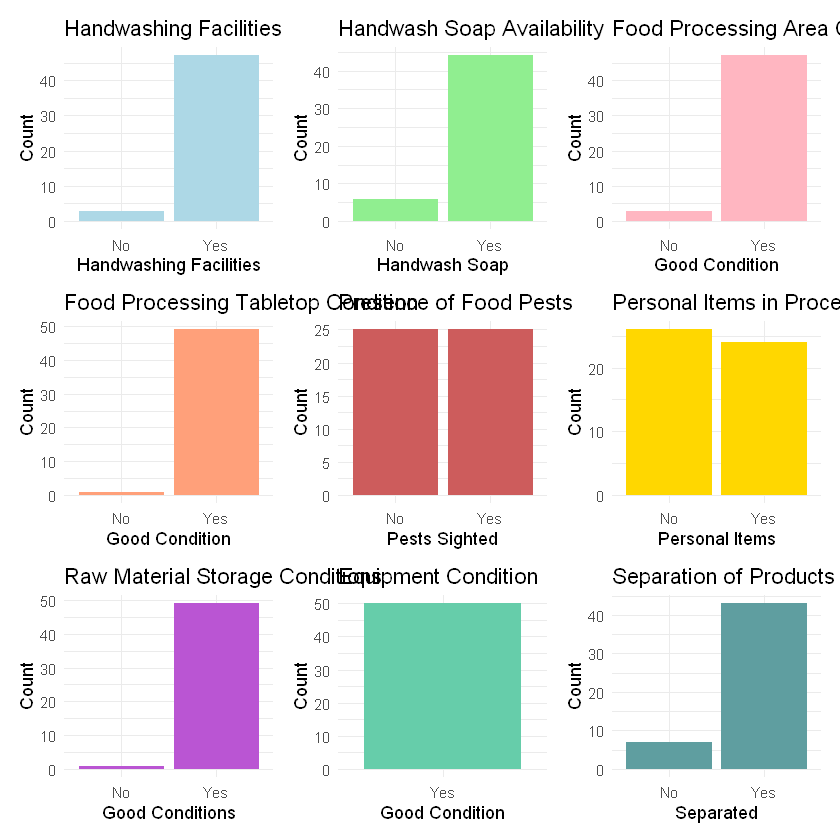

In [16]:
# Display plots in a grid (4x7 grid for all 25 plots)
(q24 | q25 | q26) /
(q27 | q28 | q29) /
(q30 | q31 | q32)

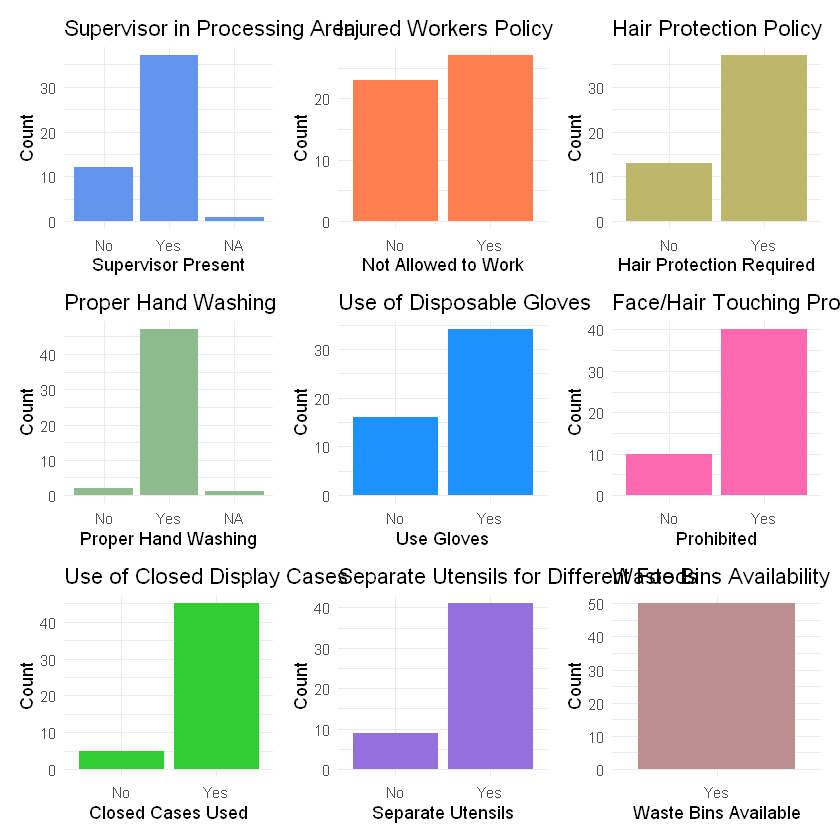

In [17]:
(q33 | q34 | q35) /
(q36 | q37 | q38) /
(q39 | q40 | q41)  

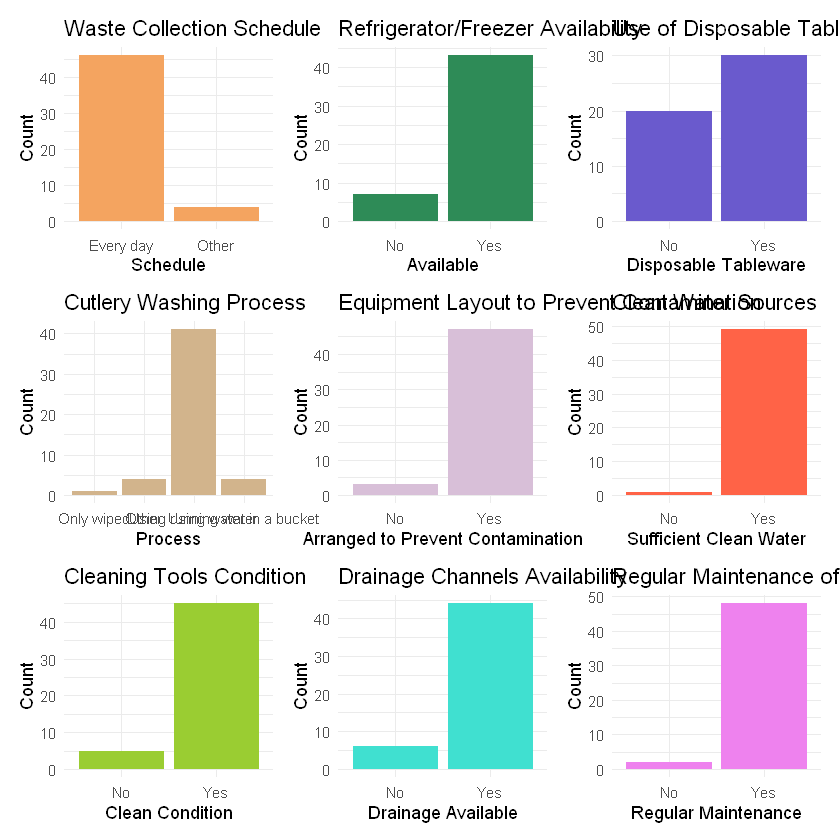

In [18]:
(q42 | q43 | q44) /
(q45 | q46 | q47) /
(q48 | q49 | q50) 

## Work environment 


In [19]:
which(colnames(dataactor) == "56. Are the buildings and production facilities free from pollution?")

c(dataactor[, 66])
c(dataactor[, 67])
c(dataactor[, 68])
c(dataactor[, 69])
c(dataactor[, 70])
c(dataactor[, 71])

[1] 71

$`51. Does the company pay attention to social factors at work (relations between workers, non-discrimination)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`52. Does the company pay attention to the psychological factors of workers at work (stress, emotions)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[49] "Yes" "Yes"

$`53. Does the company pay attention to the comfort of physical factors at work (temperature, heat, humidity, air flow, noise)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" NA    "Yes" "Yes"
[49] "Yes" "Yes"

$`54. Is the business location kept clean, free from trash, odors, smoke, dirt and dust?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`55. Is the surrounding environment maintained in a clean condition (garbage is not piled up and covered, roads are not dusty and gutters function properly)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`56. Are the buildings and production facilities free from pollution?`
 [1] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes"
[37] "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

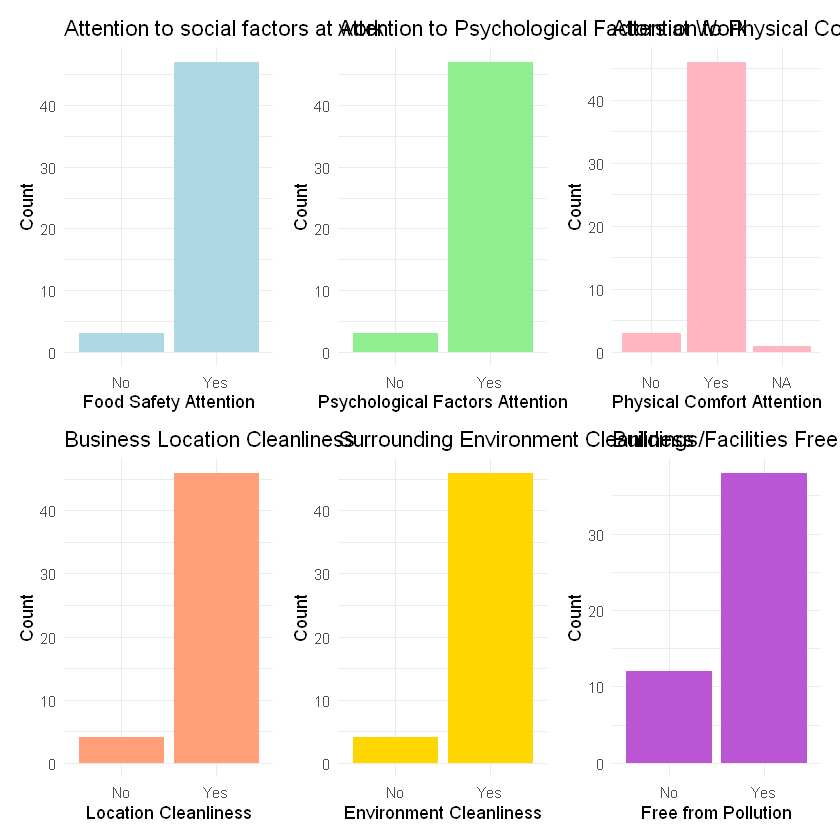

In [20]:
# Bar plot for question 51:
q51 <- ggplot(dataactor, aes(x = `51. Does the company pay attention to social factors at work (relations between workers, non-discrimination)?`)) +
    geom_bar(fill = "lightblue") +
    labs(title = "Attention to social factors at work", x = "Food Safety Attention", y = "Count") +
    theme_minimal()
# Bar plot for question 52: Attention to psychological factors at work
q52 <- ggplot(dataactor, aes(x = `52. Does the company pay attention to the psychological factors of workers at work (stress, emotions)?`)) +
    geom_bar(fill = "lightgreen") +
    labs(title = "Attention to Psychological Factors at Work", x = "Psychological Factors Attention", y = "Count") +
    theme_minimal()

# Bar plot for question 53: Attention to physical comfort factors at work
q53 <- ggplot(dataactor, aes(x = `53. Does the company pay attention to the comfort of physical factors at work (temperature, heat, humidity, air flow, noise)?`)) +
    geom_bar(fill = "lightpink") +
    labs(title = "Attention to Physical Comfort at Work", x = "Physical Comfort Attention", y = "Count") +
    theme_minimal()

# Bar plot for question 54: Business location cleanliness
q54 <- ggplot(dataactor, aes(x = `54. Is the business location kept clean, free from trash, odors, smoke, dirt and dust?`)) +
    geom_bar(fill = "lightsalmon") +
    labs(title = "Business Location Cleanliness", x = "Location Cleanliness", y = "Count") +
    theme_minimal()

# Bar plot for question 55: Surrounding environment cleanliness
q55 <- ggplot(dataactor, aes(x = `55. Is the surrounding environment maintained in a clean condition (garbage is not piled up and covered, roads are not dusty and gutters function properly)?`)) +
    geom_bar(fill = "gold") +
    labs(title = "Surrounding Environment Cleanliness", x = "Environment Cleanliness", y = "Count") +
    theme_minimal()

# Bar plot for question 56: Buildings and facilities free from pollution
q56 <- ggplot(dataactor, aes(x = `56. Are the buildings and production facilities free from pollution?`)) +
    geom_bar(fill = "mediumorchid") +
    labs(title = "Buildings/Facilities Free from Pollution", x = "Free from Pollution", y = "Count") +
    theme_minimal()

# Display plots in a grid
(q51 | q52 | q53) /
(q54 | q55 | q56)     

## Product and quality control

In [21]:
which(colnames(dataactor) == "69. How to handle partially damaged/poor quality food ingredients?  (You may choose more than one)")

c(dataactor[, 72])
c(dataactor[, 73])
c(dataactor[, 74])
c(dataactor[, 75])
c(dataactor[, 76])
c(dataactor[, 77])
c(dataactor[, 78])
c(dataactor[, 79])
c(dataactor[, 80])
c(dataactor[, 81])
c(dataactor[, 82])
c(dataactor[, 83])
c(dataactor[, 84])
c(dataactor[, 85])
c(dataactor[, 86])
c(dataactor[, 87])
c(dataactor[, 88])
c(dataactor[, 89])
c(dataactor[, 90])

[1] 90

$`57. What type of food does your shop or business sell? Choose the answers that suit you the best (you may choose more than one)`
 [1] "Fast food"             "Ready-to-eat meals"    "Fast food, Fast food" 
 [4] "Ready-to-eat meals"    "Ready-to-eat meals"    "Ready-to-eat meals"   
 [7] "Ready-to-eat meals"    "Ready-to-eat meals"    "Other"                
[10] "Ready-to-eat meals"    "Ready-to-eat meals"    "Other"                
[13] "Fast food, Fast food"  "Ready-to-eat meals"    "Ready meals, Others"  
[16] "Fresh food"            "Fast food"             "Ready-to-eat meals"   
[19] "Fast food"             "Fast food"             "Ready-to-eat meals"   
[22] "Fast food"             "Fast food"             "Ready-to-eat meals"   
[25] "Fast food"             "Fast food"             "Fast food"            
[28] "Ready-to-eat meals"    "Fresh food"            "Fast food"            
[31] "Fast food"             "Fast food, Others"     "Fast food"            
[34] "Fast food"             "Fast food"             "Fast food"            
[37] "Fresh food"            "Fast food"             "Fast food"            
[40] "Fresh food"            "Fast food, Fast food"  "Fresh food"           
[43] "Fast food, Fresh food" "Fast food"             "Fast food"            
[46] "Fast food"             "Fast food"             "Fast food"            
[49] "Fast food"             "Fast food"

$`If the answer to the previous question (Question 57) is "Other", please specify`
 [1] NA                                                             
 [2] NA                                                             
 [3] NA                                                             
 [4] NA                                                             
 [5] NA                                                             
 [6] NA                                                             
 [7] NA                                                             
 [8] NA                                                             
 [9] "Processing raw food to be cooked like hygienic home food"     
[10] "Dry food"                                                     
[11] "Dry food"                                                     
[12] "restaurant"                                                   
[13] NA                                                             
[14] NA                                                             
[15] "kebab"                                                        
[16] NA                                                             
[17] NA                                                             
[18] NA                                                             
[19] NA                                                             
[20] NA                                                             
[21] NA                                                             
[22] NA                                                             
[23] NA                                                             
[24] NA                                                             
[25] NA                                                             
[26] NA                                                             
[27] NA                                                             
[28] NA                                                             
[29] NA                                                             
[30] NA                                                             
[31] NA                                                             
[32] "Fast food in frozen and ready-to-eat form in retort packaging"
[33] NA                                                             
[34] NA                                                             
[35] NA                                                             
[36] NA                                                             
[37] NA                                                             
[38] NA                                                             
[39] NA                                                             
[40] NA                                                             
[41] NA                                                             
[42] NA                                                             
[43] NA                                                             
[44] NA                                                             
[45] NA                                                             
[46] NA                                                             
[47] NA                                                             
[48] NA                                                             
[49] NA                                                             
[50] NA

$`58. Do the products include food that needs to be reheated before being sold?`
 [1] "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
[13] "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[25] "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "No" 
[49] "Yes" "No"

$`59. How to handle products that are not sold out on one day? (You may choose more than one)`
 [1] "Stored for resale" "Stored for resale" "Discarded"        
 [4] "Stored for resale" "Discarded"         "Other"            
 [7] "Discarded"         "Stored for resale" "Other"            
[10] "Discarded"         "Discarded"         "Discarded"        
[13] "Other"             "Discarded"         "Other"            
[16] "Discarded"         "Stored for resale" "Other"            
[19] "Stored for resale" "Stored for resale" "Discarded"        
[22] "Stored for resale" "Other"             "Stored for resale"
[25] "Discarded"         "Stored for resale" "Stored for resale"
[28] "Discarded"         "Other"             "Stored for resale"
[31] "Discarded"         "Other"             "Stored for resale"
[34] "Stored for resale" "Stored for resale" "Stored for resale"
[37] "Other"             "Discarded"         "Discarded"        
[40] "Discarded"         "Other"             "Stored for resale"
[43] "Discarded"         "Discarded"         "Other"            
[46] "Stored for resale" "Other"             "Discarded"        
[49] "Discarded"         "Other"

$`If the answer to the previous question (Question 59) is "Other", please specify`
 [1] NA                                                                                                        
 [2] NA                                                                                                        
 [3] NA                                                                                                        
 [4] NA                                                                                                        
 [5] NA                                                                                                        
 [6] "Give it to neighbour"                                                                                    
 [7] NA                                                                                                        
 [8] NA                                                                                                        
 [9] "Eaten for the family or given to those in need"                                                          
[10] "None"                                                                                                    
[11] "None"                                                                                                    
[12] NA                                                                                                        
[13] "shared with peers"                                                                                       
[14] NA                                                                                                        
[15] "meat is stored, vegetables are discarded"                                                                
[16] NA                                                                                                        
[17] NA                                                                                                        
[18] "By order, there is no leftovers"                                                                         
[19] "Shawn is still in the process of being replaced."                                                        
[20] NA                                                                                                        
[21] NA                                                                                                        
[22] NA                                                                                                        
[23] "So far, orders are on demand, so they must run out. If the banana ingredients are stored in the frezeerr"
[24] NA                                                                                                        
[25] NA                                                                                                        
[26] "Sold for other types of menus (fried rice ingredients)"                                                  
[27] NA                                                                                                        
[28] NA                                                                                                        
[29] "Products that are not suitable for sale are thrown away."                                                
[30] NA                                                                                                        
[31] NA                                                                                                        
[32] "Is given to employees and eaten by themselves"                                                           
[33] NA                                                                                                        
[34] NA                                                                                                        
[35] NA                                                                                                      

$`60. Do you separate raw ingredients and cooked food?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`61. Are food ingredients washed before processing?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`62. What water source does your business use?`
 [1] "Well water"          "Well water"          "Refillable water"   
 [4] "Water companies"     "Refillable water"    "Refillable water"   
 [7] "Refillable water"    "Water companies"     "Water companies"    
[10] "Refillable water"    "Refillable water"    "Other"              
[13] "Well water"          "Water companies"     "Mobile water vendor"
[16] "Well water"          "Other"               "Water companies"    
[19] "Water companies"     "Refillable water"    "Water companies"    
[22] "Water companies"     "Other"               "Water companies"    
[25] "Water companies"     "Water companies"     "Water companies"    
[28] "Well water"          "Well water"          "Water companies"    
[31] "Well water"          "Water companies"     "Water companies"    
[34] "Water companies"     "Water companies"     "Water companies"    
[37] "Water companies"     "Water companies"     "Refillable water"   
[40] "Water companies"     "Water companies"     "Refillable water"   
[43] "Well water"          "Water companies"     "Water companies"    
[46] "Water companies"     "Refillable water"    "Water companies"    
[49] "Other"               "Refillable water"

$Column1
 [1] "Well water"          "Well water"          "Refillable water"   
 [4] "Water companies"     "Refillable water"    "Refillable water"   
 [7] "Refillable water"    "Water companies"     "Water companies"    
[10] "Refillable water"    "Refillable water"    "Other"              
[13] "Well water"          "Water companies"     "Mobile water vendor"
[16] "Well water"          "Other"               "Water companies"    
[19] "Water companies"     "Refillable water"    "Water companies"    
[22] "Water companies"     "Other"               "Water companies"    
[25] "Water companies"     "Water companies"     "Water companies"    
[28] "Well water"          "Well water"          "Water companies"    
[31] "Well water"          "Water companies"     "Water companies"    
[34] "Water companies"     "Water companies"     "Water companies"    
[37] "Water companies"     "Water companies"     "Refillable water"   
[40] "Water companies"     "Water companies"     "Refillable water"   
[43] "Well water"          "Water companies"     "Water companies"    
[46] "Water companies"     "Refillable water"    "Water companies"    
[49] "Other"               "Refillable water"

$`If the answer to the previous question (Question 62) is "Other", please specify`
 [1] NA                                                       
 [2] NA                                                       
 [3] NA                                                       
 [4] NA                                                       
 [5] NA                                                       
 [6] NA                                                       
 [7] NA                                                       
 [8] NA                                                       
 [9] NA                                                       
[10] "Bottled water"                                          
[11] "Bottled water"                                          
[12] "TAPS"                                                   
[13] "Source of water"                                        
[14] NA                                                       
[15] "gallon of water"                                        
[16] NA                                                       
[17] NA                                                       
[18] NA                                                       
[19] NA                                                       
[20] NA                                                       
[21] NA                                                       
[22] NA                                                       
[23] "Provided at the tap managed by the Floating Market Area"
[24] NA                                                       
[25] NA                                                       
[26] NA                                                       
[27] NA                                                       
[28] NA                                                       
[29] NA                                                       
[30] NA                                                       
[31] NA                                                       
[32] NA                                                       
[33] NA                                                       
[34] NA                                                       
[35] NA                                                       
[36] NA                                                       
[37] NA                                                       
[38] NA                                                       
[39] NA                                                       
[40] NA                                                       
[41] NA                                                       
[42] "Gallons"                                                
[43] NA                                                       
[44] NA                                                       
[45] NA                                                       
[46] NA                                                       
[47] NA                                                       
[48] NA                                                       
[49] "Artesis drill water"                                    
[50] NA

$`63. Do you use refillable gallon water as a source of drinking water?`
 [1] "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No" 
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No" 
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`64. Do you boil water?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" NA    "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`65. How is customer food waste handled?`
 [1] "Taken by the other party"          "Taken by the other party"         
 [3] "Discarded"                         "Taken by the other party"         
 [5] "Discarded"                         "Discarded"                        
 [7] "Discarded"                         "Discarded"                        
 [9] "Discarded, Other"                  "Other"                            
[11] "Discarded"                         "Discarded"                        
[13] "Taken by the other party"          "Discarded"                        
[15] "Discarded, Taken by another party" "Discarded"                        
[17] "Discarded"                         "Taken by the other party"         
[19] "Discarded"                         "Taken by the other party"         
[21] "Taken by the other party"          "Discarded"                        
[23] "Taken by the other party"          "Discarded"                        
[25] "Discarded"                         "Discarded"                        
[27] "Discarded"                         "Discarded"                        
[29] "Discarded"                         "Discarded"                        
[31] "Discarded"                         "Discarded, Taken by another party"
[33] "Taken by the other party"          "Discarded"                        
[35] "Discarded"                         "Discarded"                        
[37] "Discarded"                         "Discarded"                        
[39] "Discarded"                         "Discarded"                        
[41] "Discarded"                         NA                                 
[43] "Discarded"                         "Discarded"                        
[45] "Discarded"                         "Discarded"                        
[47] "Discarded"                         "Discarded"                        
[49] "Discarded"                         "Discarded"

$`If the answer to the previous question (Question 65) is "Other", please specify`
 [1] NA                                                   
 [2] NA                                                   
 [3] NA                                                   
 [4] NA                                                   
 [5] NA                                                   
 [6] NA                                                   
 [7] NA                                                   
 [8] NA                                                   
 [9] "Can be taken by people who keep ducks for duck food"
[10] "None"                                               
[11] "None"                                               
[12] NA                                                   
[13] "Managed area"                                       
[14] NA                                                   
[15] NA                                                   
[16] NA                                                   
[17] NA                                                   
[18] NA                                                   
[19] NA                                                   
[20] NA                                                   
[21] "handled by Manager"                                 
[22] NA                                                   
[23] NA                                                   
[24] NA                                                   
[25] NA                                                   
[26] NA                                                   
[27] NA                                                   
[28] NA                                                   
[29] NA                                                   
[30] NA                                                   
[31] NA                                                   
[32] NA                                                   
[33] NA                                                   
[34] NA                                                   
[35] NA                                                   
[36] NA                                                   
[37] NA                                                   
[38] NA                                                   
[39] NA                                                   
[40] NA                                                   
[41] NA                                                   
[42] NA                                                   
[43] NA                                                   
[44] NA                                                   
[45] NA                                                   
[46] NA                                                   
[47] NA                                                   
[48] NA                                                   
[49] NA                                                   
[50] NA

$`66. If the raw food materials from the supplier are not of good quality, will your business change the supplier?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[37] NA    "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`67. Are the stored food ingredients packaged in small portions according to sales portions?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "No"  "No" 
[25] "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`68. How to handle expired food? (You may choose more than one)`
 [1] "Processed into other food products"  
 [2] "Discarded"                           
 [3] "Discarded"                           
 [4] "Discarded"                           
 [5] "Discarded"                           
 [6] "Discarded"                           
 [7] "Discarded"                           
 [8] "Discarded"                           
 [9] "Discarded"                           
[10] "Discarded"                           
[11] "Discarded"                           
[12] "Discarded"                           
[13] "Discarded, Other"                    
[14] "Discarded"                           
[15] "Discarded"                           
[16] "Discarded"                           
[17] "Discarded"                           
[18] "Used & cooked again as usual, Others"
[19] "Discarded"                           
[20] "Discarded"                           
[21] "Discarded, Other"                    
[22] "Discarded"                           
[23] "Other"                               
[24] "Discarded"                           
[25] "Discarded"                           
[26] "Other"                               
[27] "Discarded"                           
[28] "Discarded"                           
[29] "Discarded"                           
[30] "Discarded"                           
[31] "Discarded"                           
[32] "Discarded"                           
[33] "Discarded"                           
[34] "Discarded, Other"                    
[35] "Discarded"                           
[36] "Discarded"                           
[37] "Discarded"                           
[38] "Discarded"                           
[39] "Discarded"                           
[40] "Discarded"                           
[41] "Discarded"                           
[42] "Discarded"                           
[43] "Discarded"                           
[44] "Discarded"                           
[45] "Discarded"                           
[46] "Discarded"                           
[47] "Discarded"                           
[48] "Discarded"                           
[49] "Discarded"                           
[50] "Discarded"

$`If the answer to the previous question (Question 68) is "Other", please specify`
 [1] NA                                                  
 [2] NA                                                  
 [3] NA                                                  
 [4] NA                                                  
 [5] NA                                                  
 [6] NA                                                  
 [7] NA                                                  
 [8] NA                                                  
 [9] NA                                                  
[10] "None"                                              
[11] "None"                                              
[12] NA                                                  
[13] "Protest to Suplier"                                
[14] NA                                                  
[15] NA                                                  
[16] NA                                                  
[17] NA                                                  
[18] "No residue for meat, the broth is reheated"        
[19] NA                                                  
[20] NA                                                  
[21] "returned to center"                                
[22] NA                                                  
[23] "According to the condition of the consumer (order)"
[24] NA                                                  
[25] NA                                                  
[26] "Never, cooked new everytime"                       
[27] NA                                                  
[28] NA                                                  
[29] NA                                                  
[30] NA                                                  
[31] NA                                                  
[32] NA                                                  
[33] NA                                                  
[34] "No expiration always runs out"                     
[35] NA                                                  
[36] NA                                                  
[37] NA                                                  
[38] NA                                                  
[39] NA                                                  
[40] NA                                                  
[41] NA                                                  
[42] NA                                                  
[43] NA                                                  
[44] NA                                                  
[45] NA                                                  
[46] NA                                                  
[47] NA                                                  
[48] NA                                                  
[49] NA                                                  
[50] NA

$`69. How to handle partially damaged/poor quality food ingredients?  (You may choose more than one)`
 [1] "Take advantage of what is still good"
 [2] "Take advantage of what is still good"
 [3] "Take advantage of what is still good"
 [4] "Discarded"                           
 [5] "Discarded"                           
 [6] "Discarded"                           
 [7] "Discarded"                           
 [8] "Discarded"                           
 [9] "Take advantage of what is still good"
[10] "Take advantage of what is still good"
[11] "Take advantage of what is still good"
[12] "Discarded"                           
[13] "Discarded"                           
[14] "Discarded"                           
[15] "Discarded"                           
[16] "Discarded"                           
[17] "Discarded"                           
[18] "Discarded"                           
[19] "Take advantage of what is still good"
[20] "Discarded"                           
[21] "Discarded"                           
[22] "Discarded"                           
[23] "Discarded"                           
[24] "Discarded"                           
[25] "Discarded"                           
[26] "Other"                               
[27] "Discarded"                           
[28] "Discarded"                           
[29] "Take advantage of what is still good"
[30] "Discarded"                           
[31] "Discarded"                           
[32] "Other"                               
[33] "Discarded"                           
[34] "Discarded"                           
[35] "Take advantage of what is still good"
[36] "Take advantage of what is still good"
[37] "Take advantage of what is still good"
[38] "Discarded"                           
[39] "Take advantage of what is still good"
[40] "Discarded"                           
[41] "Other"                               
[42] "Discarded"                           
[43] "Discarded"                           
[44] "Discarded"                           
[45] "Discarded"                           
[46] "Discarded"                           
[47] "Take advantage of what is still good"
[48] "Discarded"                           
[49] "Discarded"                           
[50] "Other"

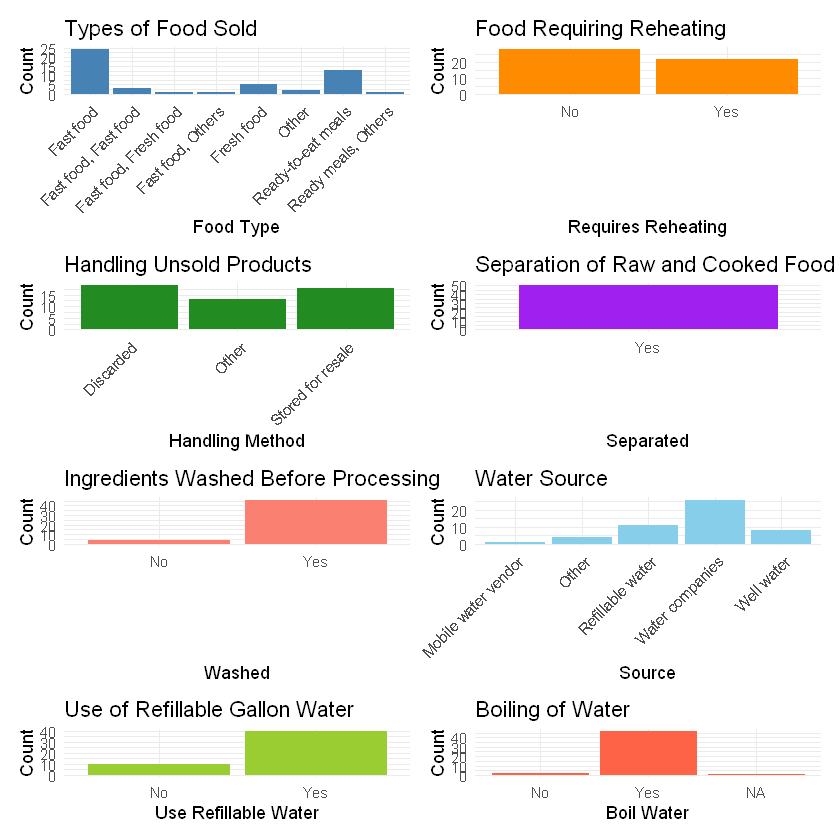

In [22]:
 
# Bar plots for product and quality control questions
q57 <- ggplot(dataactor, aes(x = `57. What type of food does your shop or business sell? Choose the answers that suit you the best (you may choose more than one)`)) +
    geom_bar(fill = "steelblue") +
    labs(title = "Types of Food Sold", x = "Food Type", y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

q58 <- ggplot(dataactor, aes(x = `58. Do the products include food that needs to be reheated before being sold?`)) +
    geom_bar(fill = "darkorange") +
    labs(title = "Food Requiring Reheating", x = "Requires Reheating", y = "Count") +
    theme_minimal()

q59 <- ggplot(dataactor, aes(x = `59. How to handle products that are not sold out on one day? (You may choose more than one)`)) +
    geom_bar(fill = "forestgreen") +
    labs(title = "Handling Unsold Products", x = "Handling Method", y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

q60 <- ggplot(dataactor, aes(x = `60. Do you separate raw ingredients and cooked food?`)) +
    geom_bar(fill = "purple") +
    labs(title = "Separation of Raw and Cooked Food", x = "Separated", y = "Count") +
    theme_minimal()

q61 <- ggplot(dataactor, aes(x = `61. Are food ingredients washed before processing?`)) +
    geom_bar(fill = "salmon") +
    labs(title = "Ingredients Washed Before Processing", x = "Washed", y = "Count") +
    theme_minimal()

q62 <- ggplot(dataactor, aes(x = `62. What water source does your business use?`)) +
    geom_bar(fill = "skyblue") +
    labs(title = "Water Source", x = "Source", y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

q63 <- ggplot(dataactor, aes(x = `63. Do you use refillable gallon water as a source of drinking water?`)) +
    geom_bar(fill = "yellowgreen") +
    labs(title = "Use of Refillable Gallon Water", x = "Use Refillable Water", y = "Count") +
    theme_minimal()

q64 <- ggplot(dataactor, aes(x = `64. Do you boil water?`)) +
    geom_bar(fill = "tomato") +
    labs(title = "Boiling of Water", x = "Boil Water", y = "Count") +
    theme_minimal()

q65 <- ggplot(dataactor, aes(x = `65. How is customer food waste handled?`)) +
    geom_bar(fill = "mediumorchid") +
    labs(title = "Customer Food Waste Handling", x = "Handling Method", y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

q66 <- ggplot(dataactor, aes(x = `66. If the raw food materials from the supplier are not of good quality, will your business change the supplier?`)) +
    geom_bar(fill = "lightblue") +
    labs(title = "Change Supplier if Quality is Poor", x = "Change Supplier", y = "Count") +
    theme_minimal()

q67 <- ggplot(dataactor, aes(x = `67. Are the stored food ingredients packaged in small portions according to sales portions?`)) +
    geom_bar(fill = "goldenrod") +
    labs(title = "Food Packaged in Small Portions", x = "Small Portions", y = "Count") +
    theme_minimal()

q68 <- ggplot(dataactor, aes(x = `68. How to handle expired food? (You may choose more than one)`)) +
    geom_bar(fill = "cadetblue") +
    labs(title = "Handling of Expired Food", x = "Handling Method", y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

q69 <- ggplot(dataactor, aes(x = `69. How to handle partially damaged/poor quality food ingredients?  (You may choose more than one)`)) +
    geom_bar(fill = "indianred") +
    labs(title = "Handling Damaged/Poor Quality Ingredients", x = "Handling Method", y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Display plots in groups
(q57 | q58) /
(q59 | q60) /
(q61 | q62) /
(q63 | q64)

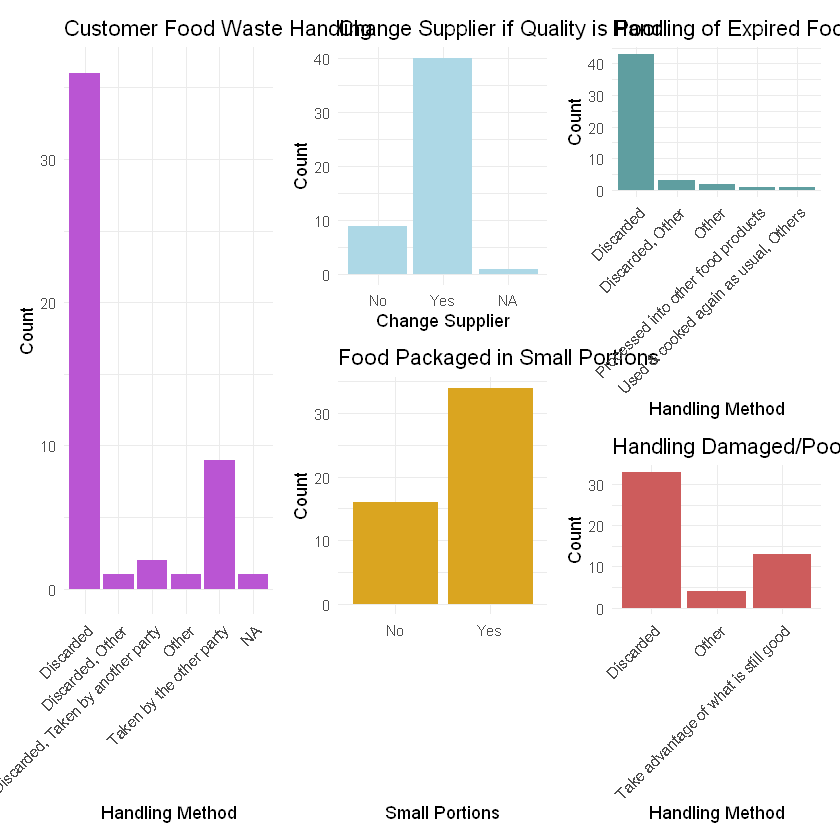

In [23]:
# Display plots in groups
q65 | q66 /
q67 | q68 / q69

## Employees competence

In [24]:
dataactor$`70. Is there anyone at your business who understands food safety?`
dataactor$`71. Have any employees undergone food safety or clean and healthy food preparation training?`
dataactor$`72. Do employees have basic knowledge on food safety principles?`

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[13] "No"  "No"  "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "No" 
[25] "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[13] "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

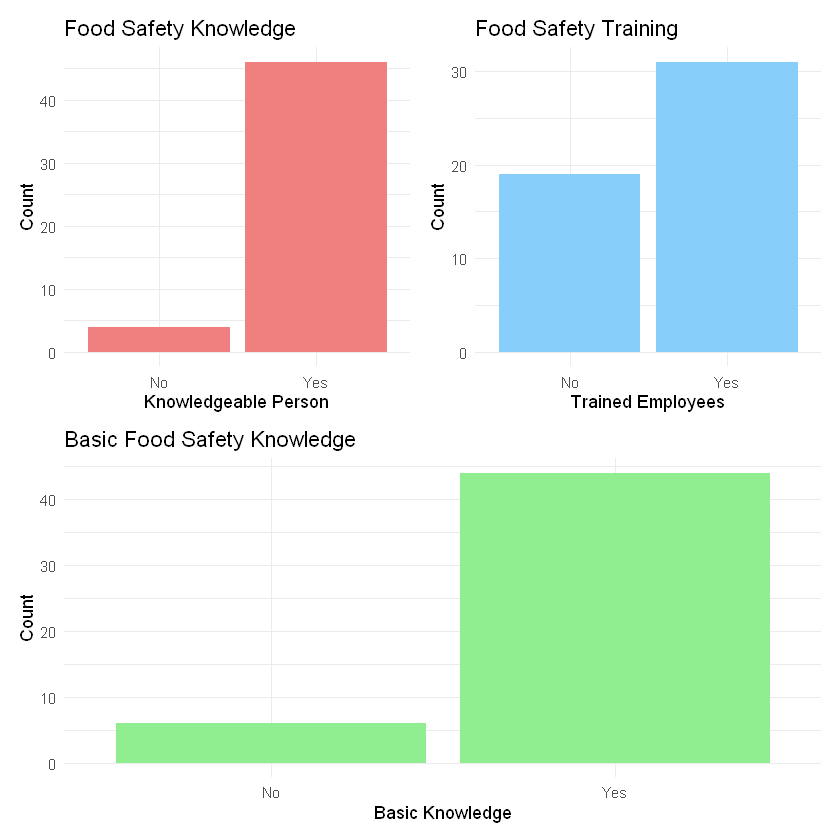

In [25]:
# bar plots for food safety knowledge
q70 <- ggplot(dataactor, aes(x = `70. Is there anyone at your business who understands food safety?`)) +
    geom_bar(fill = "lightcoral") +
    labs(title = "Food Safety Knowledge", x = "Knowledgeable Person", y = "Count") +
    theme_minimal()
q71 <- ggplot(dataactor, aes(x = `71. Have any employees undergone food safety or clean and healthy food preparation training?`)) +
    geom_bar(fill = "lightskyblue") +
    labs(title = "Food Safety Training", x = "Trained Employees", y = "Count") +
    theme_minimal()
q72 <- ggplot(dataactor, aes(x = `72. Do employees have basic knowledge on food safety principles?`)) +
    geom_bar(fill = "lightgreen") +
    labs(title = "Basic Food Safety Knowledge", x = "Basic Knowledge", y = "Count") +
    theme_minimal()

# Display food safety knowledge plots
(q70 | q71) / q72

## Documented information

In [26]:
dataactor$`73. Are there records and documentation regarding the expiration date of raw materials, incoming orders, pest control, cleaning schedules for facilities and business premises?`
dataactor$`74. Are there any records regarding worker health checks, training schedules, worker leave schedules?`


[1] "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes"
[13] "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "No"  "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes"
[37] "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

[1] "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes"
[13] "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No" 
[25] "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

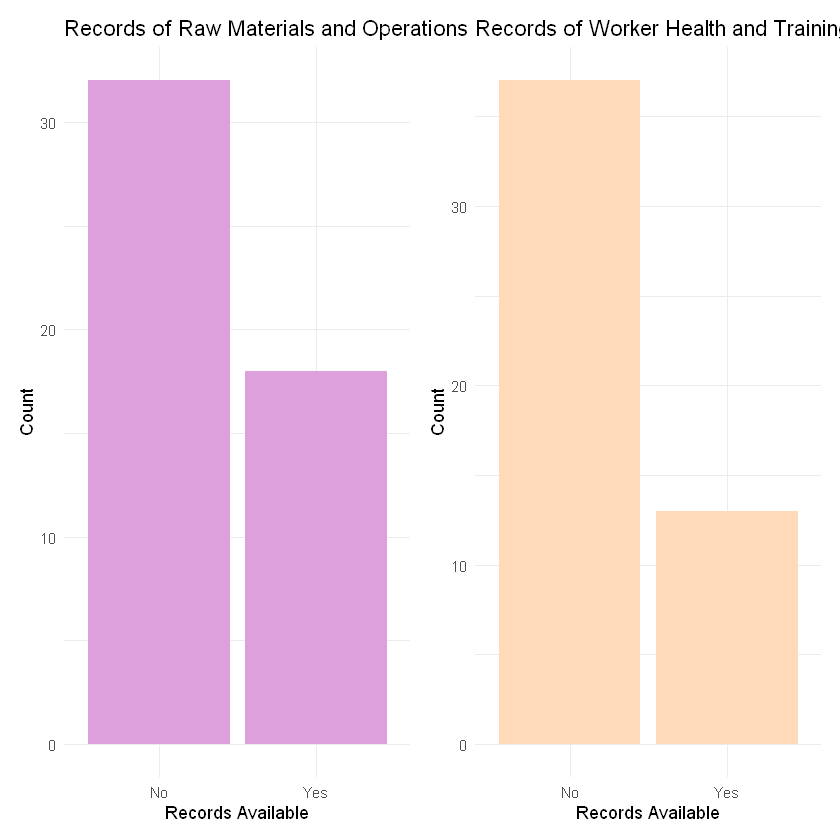

In [27]:
q73 <- ggplot(dataactor, aes(x = `73. Are there records and documentation regarding the expiration date of raw materials, incoming orders, pest control, cleaning schedules for facilities and business premises?`)) +
    geom_bar(fill = "plum") +
    labs(title = "Records of Raw Materials and Operations", x = "Records Available", y = "Count") +
    theme_minimal()
q74 <- ggplot(dataactor, aes(x = `74. Are there any records regarding worker health checks, training schedules, worker leave schedules?`)) +
    geom_bar(fill = "peachpuff") +
    labs(title = "Records of Worker Health and Training", x = "Records Available", y = "Count") +
    theme_minimal() 
# Display records and documentation plots
(q73 | q74)

## Operational

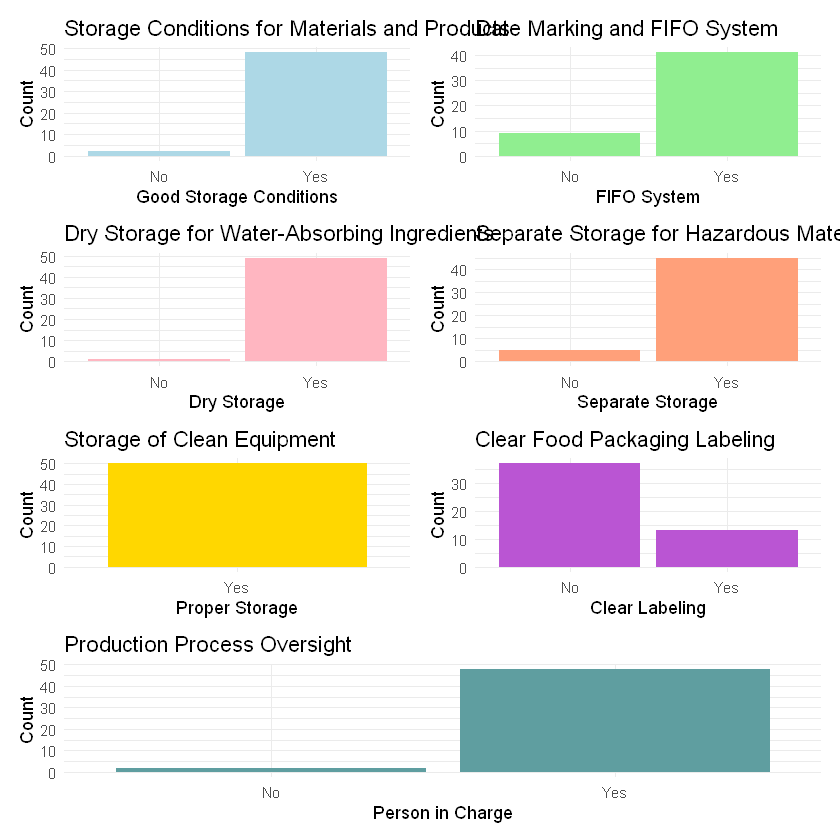

In [28]:
# Bar plot for question 75: Storage conditions for materials and products
q75 <- ggplot(dataactor, aes(x = `75. Are the materials used in the production process (i.e. raw materials, auxiliary materials, food additive) and final products stored in good conditions to avoid a decrease in quality?`)) +
    geom_bar(fill = "lightblue") +
    labs(title = "Storage Conditions for Materials and Products", x = "Good Storage Conditions", y = "Count") +
    theme_minimal()

# Bar plot for question 76: FIFO system
q76 <- ggplot(dataactor, aes(x = `76. Is the storage of materials and final products marked with dates and use the First In First Out system?`)) +
    geom_bar(fill = "lightgreen") +
    labs(title = "Date Marking and FIFO System", x = "FIFO System", y = "Count") +
    theme_minimal()

# Bar plot for question 77: Storage of water-absorbing ingredients
q77 <- ggplot(dataactor, aes(x = `77. Have ingredients that easily absorb water been stored in a dry place ? (example: salt, sugar and powdered spices)`)) +
    geom_bar(fill = "lightpink") +
    labs(title = "Dry Storage for Water-Absorbing Ingredients", x = "Dry Storage", y = "Count") +
    theme_minimal()

# Bar plot for question 78: Storage of hazardous materials
q78 <- ggplot(dataactor, aes(x = `78. Are hazardous materials such as cleaning soap, sanitation materials, insecticides, rat bait, etc. are stored in a separate room and monitored so as not to contaminate the foods?`)) +
    geom_bar(fill = "lightsalmon") +
    labs(title = "Separate Storage for Hazardous Materials", x = "Separate Storage", y = "Count") +
    theme_minimal()

# Bar plot for question 79: Storage of clean equipment
q79 <- ggplot(dataactor, aes(x = `79. Are machines/equipment that have been cleaned but not yet used stored in a clean place and in good condition, with the surface of the equipment facing down or covered, to protect it from dust, dirt or other contamination?`)) +
    geom_bar(fill = "gold") +
    labs(title = "Storage of Clean Equipment", x = "Proper Storage", y = "Count") +
    theme_minimal()

# Bar plot for question 80: Food packaging labeling
q80 <- ggplot(dataactor, aes(x = `80. Is food packaging clearly and informatively labeled to make it easier for consumers to select, handle, store, process and consume food?`)) +
    geom_bar(fill = "mediumorchid") +
    labs(title = "Clear Food Packaging Labeling", x = "Clear Labeling", y = "Count") +
    theme_minimal()

# Bar plot for question 81: Production process oversight
q81 <- ggplot(dataactor, aes(x = `81. Is there a person in charge who oversees all stages of the production process and controls it to ensure that good quality and safe food products are produced?`)) +
    geom_bar(fill = "cadetblue") +
    labs(title = "Production Process Oversight", x = "Person in Charge", y = "Count") +
    theme_minimal()

# Display plots in a grid
(q75 | q76) /
(q77 | q78) /
(q79 | q80) /
q81    

## Customer

In [29]:
dataactor$`82. Does your shop have regular customers?`
dataactor$`83. Do you ask for feedback/suggestions from customers regarding the food you sell?`
dataactor$`84. Have you ever received complaints from customers regarding the food you sell?`

[1] "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No" 
[37] "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[13] "No"  "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

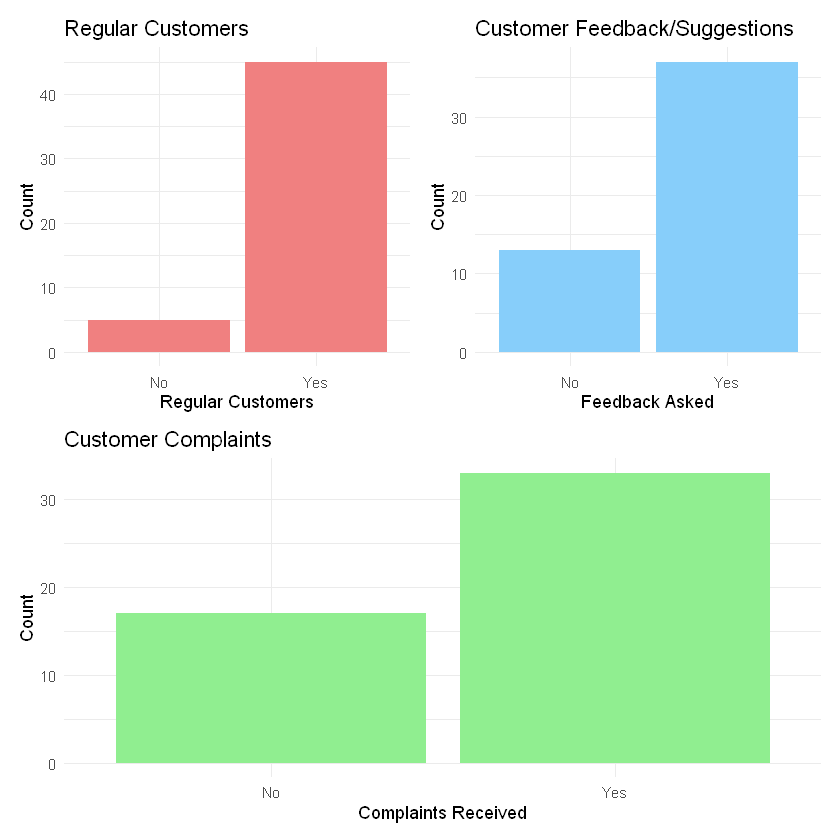

In [30]:
q83 <- ggplot(dataactor, aes(x = `82. Does your shop have regular customers?`)) +
    geom_bar(fill = "lightcoral") +
    labs(title = "Regular Customers", x = "Regular Customers", y = "Count") +
    theme_minimal()
q84 <- ggplot(dataactor, aes(x = `83. Do you ask for feedback/suggestions from customers regarding the food you sell?`)) +
    geom_bar(fill = "lightskyblue") +
    labs(title = "Customer Feedback/Suggestions", x = "Feedback Asked", y = "Count") +
    theme_minimal()
q85 <- ggplot(dataactor, aes(x = `84. Have you ever received complaints from customers regarding the food you sell?`)) +
    geom_bar(fill = "lightgreen") +
    labs(title = "Customer Complaints", x = "Complaints Received", y = "Count") +
    theme_minimal()

# Display customer interaction plots
(q83 | q84) / q85

# ISO 22000:2018
![](image.png)

## PLAN (Clause 4-7) [ LEVEL 1 ]

In [31]:
# library
library(tidyverse)
 
# Create dataset
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)
head(data) 


,individual,group,value
,<chr>,<chr>,<int>
1,Mister 1,A,14
2,Mister 2,A,18
3,Mister 3,A,95
4,Mister 4,A,63
5,Mister 5,A,88
6,Mister 6,A,23


In [32]:
# Create tables for business status and venture type
status_table <- prop.table(table(dataactor$`1. What is your status in this street vendor business?`))*100
venture_table <- prop.table(table(dataactor$`2. Is this business venture a joint venture or own capital?`))*100

status_table[2]
venture_table[2]

own <- data.frame(ques = c("Q1", "Q2"),
                   value = c(status_table[2], venture_table[2]),
                   row.names = NULL)
q3 <- prop.table(table(dataactor$`3. Does your business have a business license/legality?`))*100
q4 <- prop.table(table(dataactor$`4. Does the product being sold have a distribution permit?`))*100
own <- rbind(own, data.frame(ques = "Q3", value = q3[2], row.names = NULL))
own <- rbind(own, data.frame(ques = "Q4", value = q4[2], row.names = NULL))

q82 <- prop.table(table(dataactor$`82. Does your shop have regular customers?`))*100
own <- rbind(own, data.frame(ques = "Q82", value = q82[2], row.names = NULL))

own$group <- "Context"
own

Owner 
   60

Own capital 
         88

ques,value,group
<chr>,<dbl>,<chr>
Q1,60,Context
Q2,88,Context
Q3,88,Context
Q4,40,Context
Q82,90,Context


In [33]:
# Create data frame for leadership questions (q5-q9)
q5 <- prop.table(table(dataactor$`5. Is there anyone in charge of this business operation?`))*100
q6 <- prop.table(table(dataactor$`6. Is anyone responsible for the quality and safety of the food sold/produced?`))*100
q7 <- prop.table(table(dataactor$`7. Is anyone responsible as suppliers for raw materials?`))*100
q8 <- prop.table(table(dataactor$`8. Are there quality guidelines and procedures related to food safety in the business?`))*100
q9 <- prop.table(table(dataactor$`9. Are there any provisions regarding raw materials and products that are not suitable for use or sale?`))*100

lead <- data.frame(
    ques = c("Q5", "Q6", "Q7", "Q8", "Q9"),
    value = c(q5[2], q6[2], q7[2], q8[2], q9[2]),
    group = "Leadership"
)

# Combine with ownership data
plan_data <- rbind(own, lead)

# Create data for Planning questions (q10-q12)
q10 <- prop.table(table(dataactor$`10. While working with food, do you pay attention to matters related to the cleanliness of the food (food safety) that is sold or produced?`))*100
q11 <- prop.table(table(dataactor$`11. Does your business follow up the customer feedback for improvement?`))*100
q12 <- prop.table(table(dataactor$`12. Does your business conduct annual or periodic evaluations?`))*100

plan <- data.frame(
    ques = c("Q10", "Q11", "Q12"),
    value = c(q10[1], q11[2], q12[2]),
    group = "Planning"
)

# Add planning data to combined dataframe
plan_data <- rbind(plan_data, plan)

# View the complete PLAN data
plan_data

ques,value,group
<chr>,<dbl>,<chr>
Q1,60,Context
Q2,88,Context
Q3,88,Context
Q4,40,Context
Q82,90,Context
Q5,98,Leadership
Q6,98,Leadership
Q7,84,Leadership
Q8,86,Leadership


In [34]:
# Create a dataframe with questions and their definitions
plan_data2 <- data.frame(
    Question = c("Q1", "Q2", "Q3", "Q4", "Q82", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12"),
    Definition = c(
        "Status in business",
        "Venture type",
        "Business license/legality",
        "Product distribution permit",
        "Regular customers",
        "Person in charge of business operation",
        "Responsible for food quality and safety",
        "Responsible for raw material suppliers",
        "Quality guidelines and procedures",
        "Provisions for unsuitable raw materials/products",
        "Attention to food cleanliness",
        "Follow up on customer feedback",
        "Conduct annual/periodic evaluations"
    )
)

# Create and style the table using flextable
plan_data2

Question,Definition
<chr>,<chr>
Q1,Status in business
Q2,Venture type
Q3,Business license/legality
Q4,Product distribution permit
Q82,Regular customers
Q5,Person in charge of business operation
Q6,Responsible for food quality and safety
Q7,Responsible for raw material suppliers
Q8,Quality guidelines and procedures


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_bar()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_bar()`)."


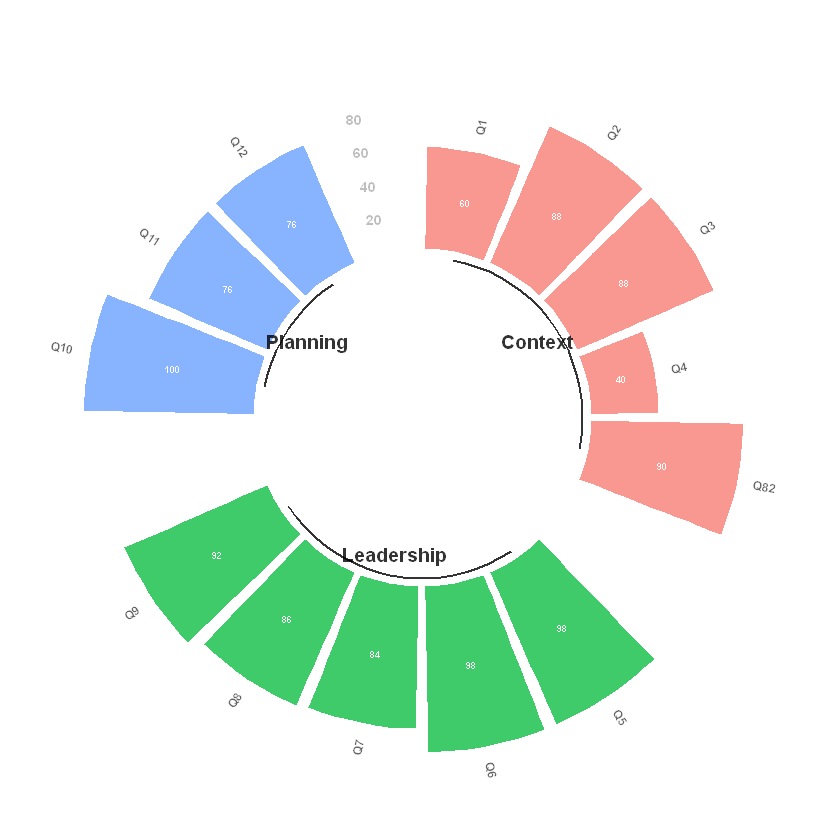

In [35]:
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 1
to_add <- data.frame(matrix(NA, empty_bar*length(unique(plan_data$group)), ncol(plan_data)))
colnames(to_add) <- colnames(plan_data)
to_add$group <- rep(unique(plan_data$group), each=empty_bar)
plan_data <- rbind(plan_data, to_add)
plan_data <- plan_data %>% arrange(group)
plan_data$id <- seq(1, nrow(plan_data))

# Get the name and the y position of each label
label_data <- plan_data %>% filter(!is.na(value))
number_of_bar <- nrow(plan_data)
angle <- 90 - 360 * (label_data$id-0.5)/number_of_bar
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)

# prepare a data frame for base lines
base_data <- plan_data %>% 
    group_by(group) %>% 
    summarize(start=min(id), end=max(id) - empty_bar) %>% 
    rowwise() %>% 
    mutate(title=mean(c(start, end)))

# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[c(nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]

# Make the plot
p <- ggplot(plan_data, aes(x=as.factor(id), y=value, fill=group)) +
    
    geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
    
    # Add a val=100/75/50/25 lines
    geom_segment(data=grid_data, aes(x = end, y = 80, xend = start, yend = 80), colour = "grey", alpha=1, size=0.3, inherit.aes = FALSE) +
    geom_segment(data=grid_data, aes(x = end, y = 60, xend = start, yend = 60), colour = "grey", alpha=1, size=0.3, inherit.aes = FALSE) +
    geom_segment(data=grid_data, aes(x = end, y = 40, xend = start, yend = 40), colour = "grey", alpha=1, size=0.3, inherit.aes = FALSE) +
    geom_segment(data=grid_data, aes(x = end, y = 20, xend = start, yend = 20), colour = "grey", alpha=1, size=0.3, inherit.aes = FALSE) +
    
    # Add text showing the value of each 100/75/50/25 lines
    annotate("text", x = rep(max(plan_data$id),4), y = c(20, 40, 60, 80), label = c("20", "40", "60", "80"), color="grey", size=3, angle=0, fontface="bold", hjust=1) +
    
    geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
    ylim(-100,120) +
    theme_minimal() +
    theme(
        legend.position = "none",
        axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        plot.margin = unit(rep(-1,4), "cm") 
    ) +
    coord_polar() + 
    # Add question labels
    geom_text(data=label_data, aes(x=id, y=value+10, label=ques, hjust=hjust), 
              color="black", fontface="bold", alpha=0.6, size=2.5, 
              angle=label_data$angle, inherit.aes = FALSE) +
    
    # Add value labels
    geom_text(data=label_data, aes(x=id, y=value/2, label=round(value,1)), 
              color="white", fontface="bold", size=2, inherit.aes = FALSE) +
    
    # Add base line information
    geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), 
                 colour = "black", alpha=0.8, size=0.6, inherit.aes = FALSE) +
    geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=0.5, 
              colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)

p

In [36]:
# plan_data to csv
write.csv(plan_data, "data/slides5.csv", row.names = FALSE)

In [37]:
dataactor$`Types of Shop2` <- c(
  "Food",
  "Culinary",
  "Food Outlets",
  "Grocery Store",
  "Bohay Tea Culinary",
  "Food Stall",
  "Food Stall",
  "Prepared Food",
  "Culinary",
  "Culinary",
  "Dry Food",
  "Food Stalls",
  "Stall",
  "Roadside Carts",
  "Merhaba Kebab",
  "Mrs Esih’s Lotek Stall",
  "Pempek Boss",
  "Kardjan Satay Stall",
  "Sakum Meatball Noodles",
  "Food",
  "Fiery Duck",
  "Food",
  "B & JO Crispy Banana and Skewered Banana",
  "Smashed Fried Chicken",
  "Food and Beverage",
  "Street Food",
  "Lembang Fried Meatball Cart",
  "\"Gudeg Just Delicious\" Eatery",
  "Fried Rice Shop",
  "Tofu Meatball Culinary",
  "Maranggi Satay Stall Purwakarta",
  "Food Stalls",
  "Seafood",
  "Field Eel",
  "Fried Shrimp and Tofu Salad",
  "\"Marem\" Meatball Stall",
  "\"Mbak Sri\" Gudeg Rice Stall",
  "Melting Coconut Cake 99",
  "Lamongan Chicken Soup Cart",
  "\"Ngaduk\" Sweet Corn with Mozzarella",
  "Thai Tea and Egg Sausage",
  "Leker Crepes Family",
  "Al Hikmah Stall",
  "Kebab",
  "Night Culinary",
  "Pasar Gede 2nd Floor Solo",
  "\"Lele Melet\" Catfish Stall",
  "Brawijaya Steak",
  "\"Pak Man\" Cooked Fast Food Stall Gunung Kidul",
  "Steak and Shake Stall"
)


Warning message:
"package 'wordcloud' was built under R version 4.4.3"
Loading required package: RColorBrewer

Warning message:
"package 'tm' was built under R version 4.4.3"
Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate


Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"


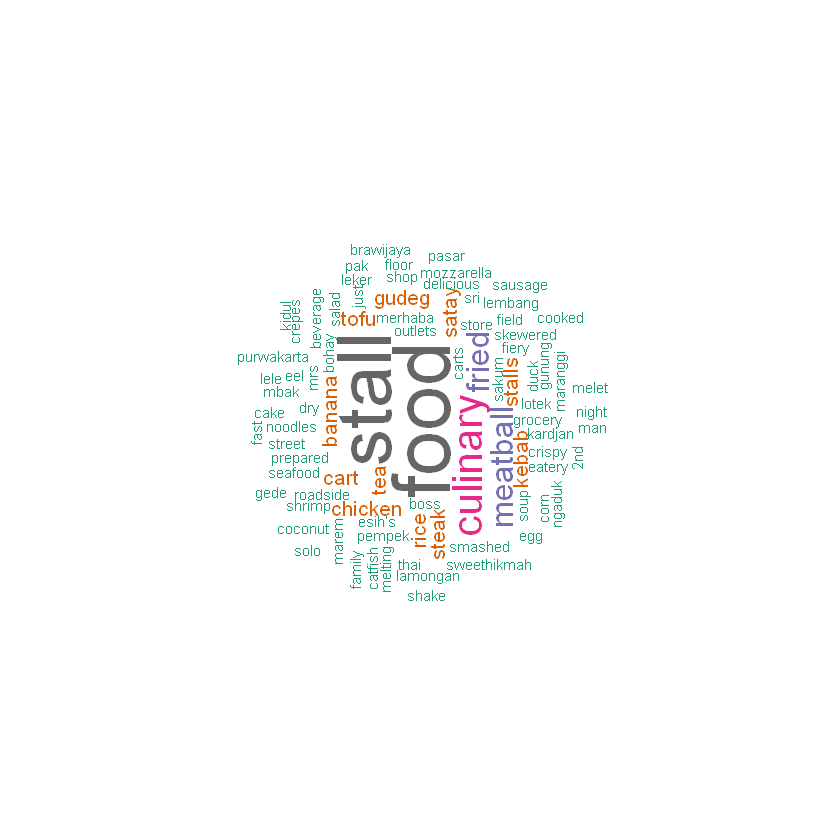

In [38]:
# type of shop
# 'Food''Culinary''Food Outlets''grocery store''Teh bohay kuliner''Warong''Finished Food''Dry food''Food stalls''Stall''Roadside carts''Merhaba Kebab''Warung Lotek Bu Esih''Juragan pempek''Warung Sate Kardjan''Mie baso sakum''Bebek Garang''B & JO Banana Crispy dan Pisang Lilit''Ayam Geprek''FnB''Street food''Rombong Baso Goreng Lembang''Warung Makan "Gudeg Pas Enak"''Ruko nasgor''Kuliner Baso Tahu''Warung Sate Maranggi Purwakarta''Seafood''Belut sawah''Tahu gimbal''Warung Bakso "Marem"''Warung Nasi Gudeg "Mbak Sri"''Pancong lumer 99''Rombong soto lamongab''Jagung Manis Mozarella "Ngaduk"''Thai tea dan sosil telur''Leker Crepes Family''Warung Al Hikmah''Kebab''Evening Culinary''Pasar Gede Lt.2 Solo''Warung  "Lele Melet"''Brawijaya Steak''Warung Makanan cepat saji (matengan) Pak Man Gunung Kidul''Warung Steak and Shake'

# Load required libraries for word cloud
library(wordcloud)
library(tm)
library(RColorBrewer)

# Extract shop types and remove NAs
shop_types <- na.omit(dataactor$`Types of Shop2`)
write.csv(shop_types, "data/slides6.csv", row.names = FALSE)
# Create a text corpus
corpus <- Corpus(VectorSource(shop_types))

# Clean the text
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords("english"))

# Create a term-document matrix
tdm <- TermDocumentMatrix(corpus)
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word=names(v), freq=v)

# Generate the word cloud
set.seed(1234) # For reproducibility
wordcloud(words=d$word, freq=d$freq, min.freq=1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

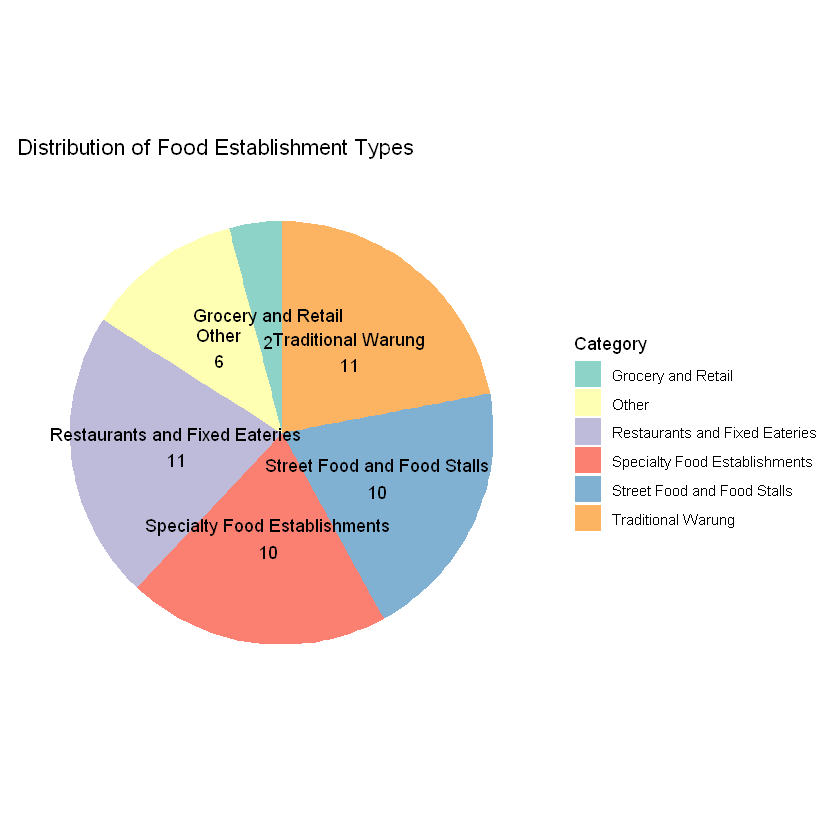

In [39]:
# Create categorization of food establishments
food_establishments <- list(
  "Street_Food_and_Food_Stalls" = c(
    "Roadside carts", "Rombong Baso Goreng Lembang", "Rombong soto lamongab",
    "Thai tea dan sosil telur", "Jagung Manis Mozarella 'Ngaduk'",
    "Pancong lumer 99", "Leker Crepes Family", "Street food", "Food stalls", "Stall"
  ),
  
  "Traditional_Warung" = c(
    "Warung Lotek Bu Esih", "Warung Sate Kardjan", "Warung Sate Maranggi Purwakarta",
    "Warung Bakso 'Marem'", "Warung Nasi Gudeg 'Mbak Sri'", "Warung Al Hikmah",
    "Warung 'Lele Melet'", "Warung", "Warung Makanan cepat saji (matengan) Pak Man Gunung Kidul",
    "Teh bohay kuliner"
  ),
  
  "Specialty_Food_Establishments" = c(
    "Juragan pempek", "Bebek Garang", "Ayam Geprek", "Merhaba Kebab", "Kebab",
    "Seafood", "Kuliner Baso Tahu", "Belut sawah", "Tahu gimbal", "B & JO Banana Crispy dan Pisang Lilit"
  ),
  
  "Restaurants_and_Fixed_Eateries" = c(
    "Ruko nasgor", "Brawijaya Steak", "Warung Steak and Shake", "Pasar Gede Lt.2 Solo",
    "Evening Culinary", "Mie baso sakum", "FnB", "Food Outlets", "Finished Food", "Culinary"
  ),
  
  "Grocery_and_Retail" = c(
    "Grocery store", "Dry food"
  )
)

# Function to categorize food establishments
categorize_establishment <- function(shop_type) {
    if (is.na(shop_type)) return(NA)
    
    for (category_name in names(food_establishments)) {
        if (any(sapply(food_establishments[[category_name]], function(x) 
                                    grepl(tolower(x), tolower(shop_type), fixed = TRUE)))) {
            return(category_name)
        }
    }
    return("Other")
}

# Apply the categorization function
dataactor$establishment_category <- sapply(dataactor$`Types of Shop`, categorize_establishment)

# Replace underscores with spaces for better readability
dataactor$establishment_category <- gsub("_", " ", dataactor$establishment_category)

# Count establishments by category
establishment_counts <- table(dataactor$establishment_category)
establishment_df <- as.data.frame(establishment_counts)
colnames(establishment_df) <- c("Category", "Count")

# Create a pie chart of establishment categories
ggplot(establishment_df, aes(x = "", y = Count, fill = Category)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y", start = 0) +
    theme_minimal() +
    theme(
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank()
    ) +
    labs(title = "Distribution of Food Establishment Types") +
    geom_text(aes(label = paste0(Category, "\n", Count)), 
                        position = position_stack(vjust = 0.5)) +
    scale_fill_brewer(palette = "Set3")

In [40]:
# Create data for Support questions (clause 7)

# 7.1.2 Human Resources (Q17, Q19, Q20, Q21, Q23)
q17 <- prop.table(table(dataactor$`17.  Do workers change clothes before work or wear special working attire?`))*100
q19 <- prop.table(table(dataactor$`19. Are there any provisions for periodic health checks for workers?`))*100
q20 <- prop.table(table(dataactor$`20. Does this business have employees who work specifically as cashiers?`))*100
q21 <- prop.table(table(dataactor$`21. Is the cashier allowed to do food processing?`))*100
q23 <- prop.table(table(dataactor$`23. Is there any prohibition for workers who process food to wear jewelry, watches, brooches and others?`))*100

human_resources <- data.frame(
    ques = c("Q17", "Q19", "Q20", "Q21", "Q23"),
    value = c(q17[2], q19[2], q20[2], q21[2], q23[2]),
    group = "Human Resources"
)

# 7.1.3 Infrastructure (Q24-50)
# Taking key infrastructure questions
q28 <- prop.table(table(dataactor$`28. Have you ever seen food pests (rats, insects) at your business location?`))*100
q29 <- prop.table(table(dataactor$`29. Have you ever seen personal items (cell phones, bags) of workers in food processing areas?`))*100

infrastructure <- data.frame(
    ques = c("Q28", "Q29"),
    value = c(q28[1], q29[1]),
    group = "Infrastructure"
)

# 7.1.4 Work environment (Q51-56)
# 7.5 Documented information (Q73-74)
q73 <- prop.table(table(dataactor$`73. Are there records and documentation regarding the expiration date of raw materials, incoming orders, pest control, cleaning schedules for facilities and business premises?`))*100
q74 <- prop.table(table(dataactor$`74. Are there any records regarding worker health checks, training schedules, worker leave schedules?`))*100

documented_info <- data.frame(
    ques = c("Q73", "Q74"),
    value = c(q73[2], q74[2]),
    group = "Documented information"
)

# Combine all Support data (Clause 7)
support_data <- rbind(human_resources, infrastructure, documented_info)
support_data

ques,value,group
<chr>,<dbl>,<chr>
Q17,50,Human Resources
Q19,18,Human Resources
Q20,36,Human Resources
Q21,50,Human Resources
Q23,38,Human Resources
Q28,50,Infrastructure
Q29,52,Infrastructure
Q73,36,Documented information
Q74,26,Documented information


In [41]:
# Create a dataframe with questions and their definitions 
support_data2 <- data.frame(
    Question = c("Q17", "Q19", "Q20", "Q21", "Q23", "Q28", "Q29", "Q73", "Q74"),
    Definition = c(
        "Workers change clothes/wear special attire",
        "Periodic health checks for workers",
        "Employees as cashiers",
        "Cashier allowed to process food",
        "Prohibition on jewelry/watches",
        "Food pests seen at business location",
        "Personal items in processing areas",
        "Records on raw materials/operations",
        "Records on worker health/training"
    ),
    Subcluase = support_data$group
)
# Create and style the table using flextable
support_data2

Question,Definition,Subcluase
<chr>,<chr>,<chr>
Q17,Workers change clothes/wear special attire,Human Resources
Q19,Periodic health checks for workers,Human Resources
Q20,Employees as cashiers,Human Resources
Q21,Cashier allowed to process food,Human Resources
Q23,Prohibition on jewelry/watches,Human Resources
Q28,Food pests seen at business location,Infrastructure
Q29,Personal items in processing areas,Infrastructure
Q73,Records on raw materials/operations,Documented information
Q74,Records on worker health/training,Documented information


In [42]:
# ues	value	group
#<chr>	<dbl>	<chr>
#Q17	50	Human Resources
#Q19	18	Human Resources
#Q20	36	Human Resources
#Q21	50	Human Resources
#Q23	38	Human Resources
#Q28	50	Infrastructure
#Q29	52	Infrastructure
#Q73	36	Documented information
# support_data

# 


## Clean data, select relevant columns from daraactors, and remove NAs
support_data_clean <- dplyr::select(dataactor, 
    `17.  Do workers change clothes before work or wear special working attire?`,
    `19. Are there any provisions for periodic health checks for workers?`,
    `20. Does this business have employees who work specifically as cashiers?`,
    `21. Is the cashier allowed to do food processing?`,
    `23. Is there any prohibition for workers who process food to wear jewelry, watches, brooches and others?`,
    `28. Have you ever seen food pests (rats, insects) at your business location?`,
    `29. Have you ever seen personal items (cell phones, bags) of workers in food processing areas?`,
    `73. Are there records and documentation regarding the expiration date of raw materials, incoming orders, pest control, cleaning schedules for facilities and business premises?`,
    `74. Are there any records regarding worker health checks, training schedules, worker leave schedules?`
)
# Rename columns for clarity
colnames(support_data_clean) <- c("Q17", "Q19", "Q20", "Q21", "Q23", "Q28", "Q29", "Q73", "Q74")

support_data_clean$Q17 <- factor(support_data_clean$Q17, levels = c("Yes", "No"))
support_data_clean$Q19 <- factor(support_data_clean$Q19, levels = c("Yes", "No"))
support_data_clean$Q20 <- factor(support_data_clean$Q20, levels = c("Yes", "No"))
support_data_clean$Q21 <- factor(support_data_clean$Q21, levels = c("Yes", "No"))
support_data_clean$Q23 <- factor(support_data_clean$Q23, levels = c("Yes", "No"))
support_data_clean$Q28 <- factor(support_data_clean$Q28, levels = c("Yes", "No"))
support_data_clean$Q29 <- factor(support_data_clean$Q29, levels = c("Yes", "No"))
support_data_clean$Q73 <- factor(support_data_clean$Q73, levels = c("Yes", "No"))
support_data_clean$Q74 <- factor(support_data_clean$Q74, levels = c("Yes", "No"))

str(support_data_clean)


tibble [50 × 9] (S3: tbl_df/tbl/data.frame)
 $ Q17: Factor w/ 2 levels "Yes","No": 1 2 2 1 1 1 1 2 1 1 ...
 $ Q19: Factor w/ 2 levels "Yes","No": 1 2 2 2 2 2 2 2 2 2 ...
 $ Q20: Factor w/ 2 levels "Yes","No": 2 2 1 2 1 1 1 2 2 2 ...
 $ Q21: Factor w/ 2 levels "Yes","No": 2 1 2 1 2 2 2 1 1 1 ...
 $ Q23: Factor w/ 2 levels "Yes","No": 1 2 1 1 1 1 1 2 2 1 ...
 $ Q28: Factor w/ 2 levels "Yes","No": 1 2 2 2 2 2 2 2 2 1 ...
 $ Q29: Factor w/ 2 levels "Yes","No": 2 2 2 2 2 2 2 2 2 1 ...
 $ Q73: Factor w/ 2 levels "Yes","No": 2 2 1 2 2 2 2 2 2 2 ...
 $ Q74: Factor w/ 2 levels "Yes","No": 2 2 1 2 2 2 2 2 2 2 ...


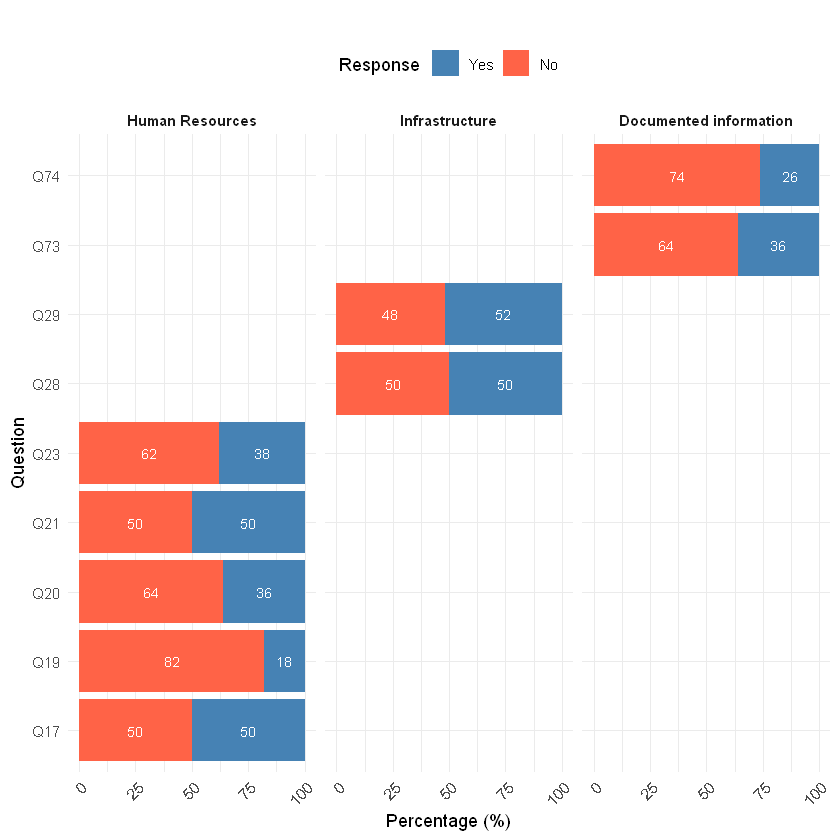

In [43]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Assuming your existing support_data
support_data <- data.frame(
  ques = c('Q17', 'Q19', 'Q20', 'Q21', 'Q23', 'Q28', 'Q29', 'Q73',  'Q74'),
  value = c(50, 18, 36, 50, 38, 50, 52, 36,26),
  group = c('Human Resources', 'Human Resources', 'Human Resources', 
            'Human Resources', 'Human Resources', 'Infrastructure', 
            'Infrastructure', 'Documented information', 'Documented information')
)
# relevels group factor to ensure correct order in the plot
support_data$group <- factor(support_data$group, 
                             levels = c('Human Resources', 'Infrastructure', 'Documented information'))

# Create 'No' column as the complement of 'Yes'
support_data_long <- support_data %>%
  mutate(No = 100 - value) %>%  # No is 100 - value for the 'No' percentage
  rename(Yes = value) %>%       # Rename value column to Yes
  pivot_longer(cols = c("Yes", "No"), 
               names_to = "Response", 
               values_to = "Percentage")  # Convert to long format

# Ensure the "No" response is on the left and "Yes" is on the right
support_data_long$Response <- factor(support_data_long$Response, 
                                      levels = c("Yes", "No"))

write.csv(support_data_long, "data/slides8.csv", row.names = FALSE)
# Add value labels
ggplot(support_data_long, aes(x = ques, y = Percentage, fill = Response)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(Percentage, 1)), 
            position = position_stack(vjust = 0.5), size = 3, color = "white") +
  coord_flip() +
  scale_fill_manual(values = c("Yes" = "steelblue", "No" = "tomato")) +
  facet_wrap(~ group, scales = "free_x") +
  labs(title = "",
       x = "Question", 
       y = "Percentage (%)",
       fill = "Response") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(face = "bold"),
        legend.position = "top")


In [44]:
library(stringr)

# Define which questions should have their 'Yes'/'No' responses inverted
invert_questions <- c("Q15") # add more if needed

reshaped_data <- dataactor %>%
    select(starts_with("13"), starts_with("15"), starts_with("16"), starts_with("17"),
                 starts_with("18"), starts_with("19"), starts_with("20"), starts_with("21"), starts_with("22"),
                 starts_with("23")) %>%
    gather(key = "Question", value = "Response") %>%
    mutate(Question = paste0("Q", str_extract(Question, "\\d+"))) %>%
    mutate(Response = case_when(
        Question %in% invert_questions & Response == "Yes" ~ "No",
        Question %in% invert_questions & Response == "No" ~ "Yes",
        TRUE ~ Response
    )) %>%
    group_by(Question, Response) %>%
    summarise(Count = n(), .groups = "drop")

# filter just the 'Yes' responses
reshaped_data_yes <- reshaped_data %>%
    filter(Response == "Yes")   

# Calculate the average percentage of 'Yes' responses per question (scaled 0-100)
total_responses <- reshaped_data %>%
    group_by(Question) %>%
    summarise(Total = sum(Count), .groups = "drop")

reshaped_data_yes <- reshaped_data_yes %>%
    left_join(total_responses, by = "Question") %>%
    mutate(Percent = (Count / Total) * 100)

reshaped_data_yes_avg <- mean(reshaped_data_yes$Percent)
reshaped_data_yes_avg

[1] 66.2

In [45]:
# infra: question 24 to 50
infra <- 80.08888888888889
# work_env : question 51 to 56
work_env <- 79.17

# prodduct_quality : question 57 to 69
product_quality <- 74.88

# employee competence : question 70 to 72
employee_competence <- 73.333

# records_documentation : question 73 to 74
records_documentation <- 32.5

# Offcial data frame
official_data <- data.frame(
    Category = c("Infrastructure", "Work Environment", "Product and Quality Control", "Employee Competence", "Documented Information"),
    Average_Percentage = c(infra, work_env, product_quality, employee_competence, records_documentation)
)
official_data

Category,Average_Percentage
<chr>,<dbl>
Infrastructure,80.08889
Work Environment,79.17000
Product and Quality Control,74.88000
Employee Competence,73.33300
Documented Information,32.50000


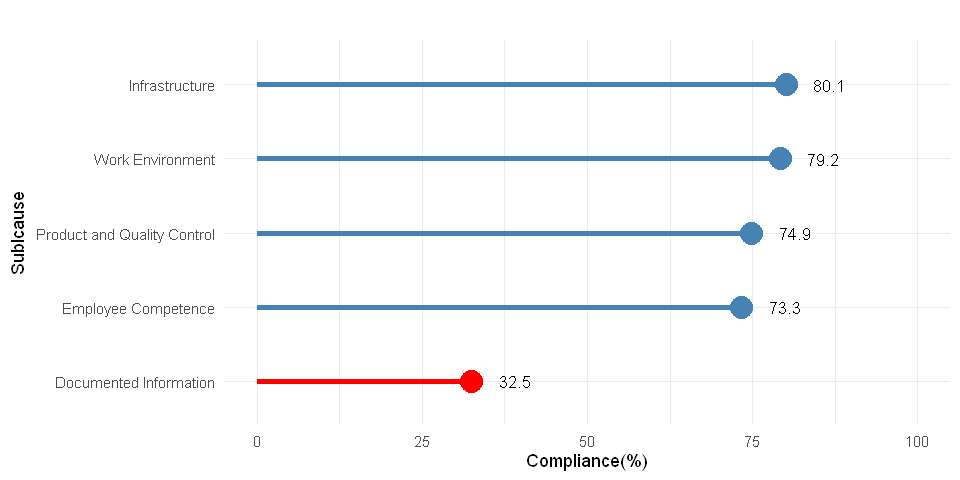

In [46]:
library(ggplot2)

official_data$Color <- ifelse(official_data$Average_Percentage < 50, "red", "steelblue")
write.csv(official_data, "data/slides7.csv", row.names = FALSE)
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(official_data, aes(x = reorder(Category, Average_Percentage), y = Average_Percentage)) +
    geom_segment(aes(x = Category, xend = Category, y = 0, yend = Average_Percentage, color = Color), size = 1.5) +
    geom_point(aes(color = Color), size = 6) +
    scale_color_identity() +
    coord_flip() +
    labs(title = "",
         x = "Sublcause",
         y = "Compliance(%)") +
    geom_text(aes(label = round(Average_Percentage, 1)), hjust = 1.2, size = 3.5, nudge_y = 10) +
    ylim(0, 100) +
    theme_minimal()

Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 100, :
"materials could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 100, :
"trash could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 100, :
"contamination could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 100, :
"protect could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 100, :
"properly could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 100, :
"disposable could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1

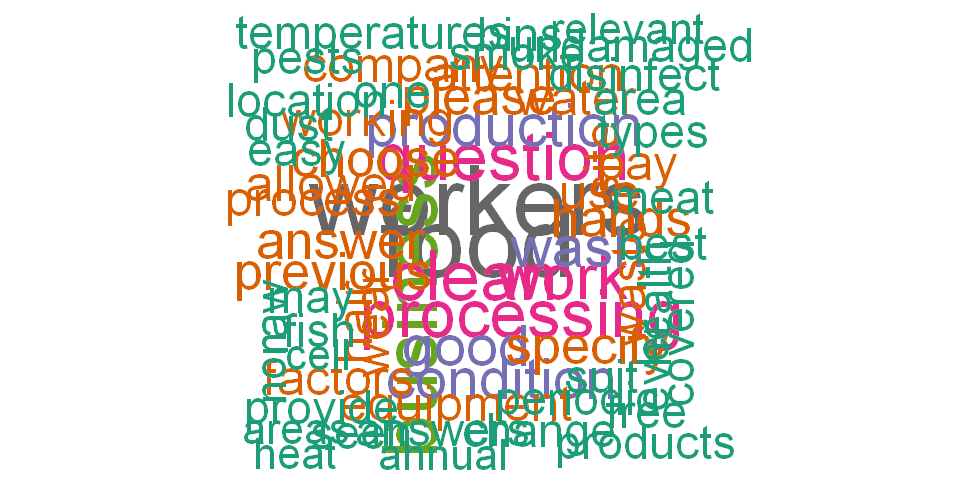

In [47]:
# Load required libraries for word cloud
library(wordcloud)
library(tm)
library(RColorBrewer)

# Use the column names from Q24 to Q50
q24_50_colnames <- colnames(dataactor)[24:74]

# Clean the column names: remove punctuation, convert to lower case, remove stopwords
clean_names <- tolower(q24_50_colnames)
clean_names <- gsub("[[:punct:]]", " ", clean_names)
clean_names <- removeWords(clean_names, stopwords("english"))

# Create a text corpus from the cleaned column names
corpus <- Corpus(VectorSource(clean_names))

# Create a term-document matrix
tdm <- TermDocumentMatrix(corpus)
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word=names(v), freq=v)

# Generate the word cloud
set.seed(1234)
wordcloud(words=d$word, freq=d$freq, min.freq=1,
          max.words=100, random.order=FALSE, rot.per=0.2, scale = c(5, 2),
          colors=brewer.pal(8, "Dark2"))

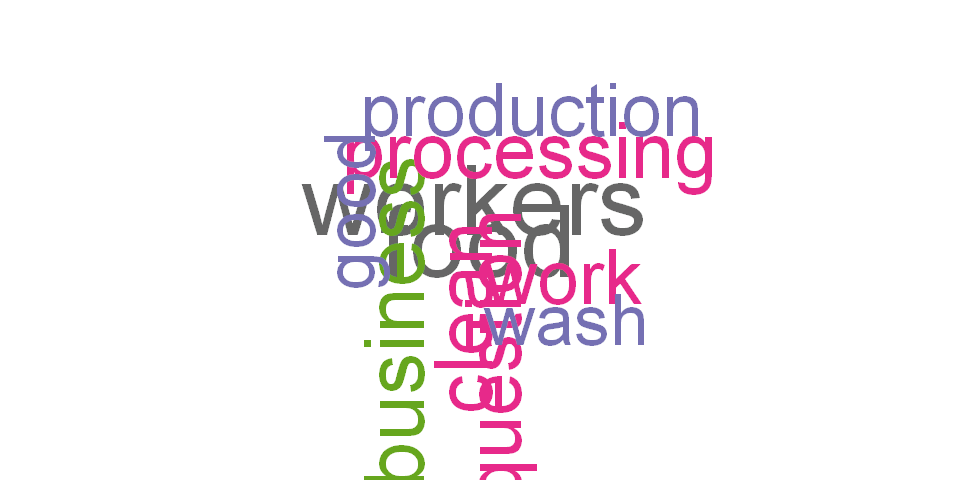

In [48]:
# Generate the word cloud with more space between words by adjusting 'scale'
set.seed(1234)
wordcloud(
    words = d$word,
    freq = d$freq,
    min.freq = 2,
    max.words = 10,
    random.order = FALSE,
    rot.per = 0.35,
    colors = brewer.pal(8, "Dark2"),
    scale = c(5, 3),      # Increase the size difference for more spacing
    family = "sans"       # Optional: use a clean font for better spacing
)


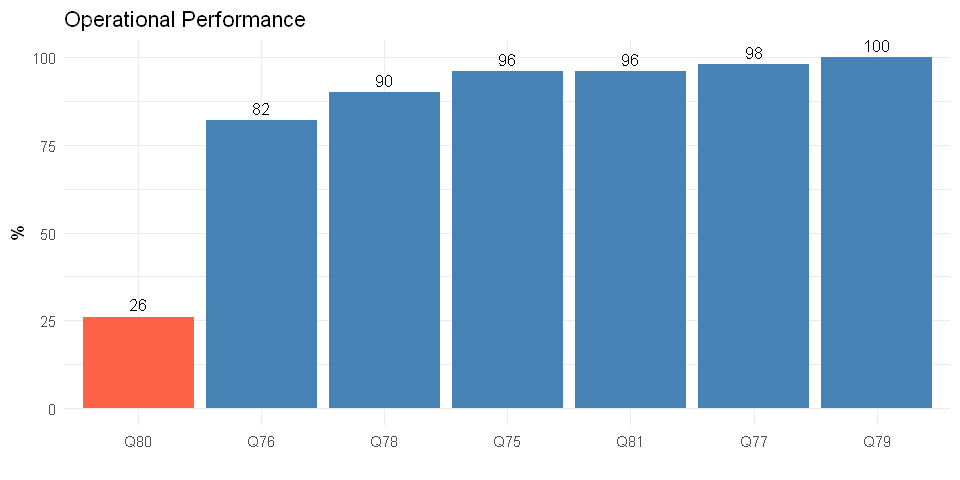

In [78]:
# Prepare data for operation questions Q75-Q81
operation_questions <- c(
    "75. Are the materials used in the production process (i.e. raw materials, auxiliary materials, food additive) and final products stored in good conditions to avoid a decrease in quality?",
    "76. Is the storage of materials and final products marked with dates and use the First In First Out system?",
    "77. Have ingredients that easily absorb water been stored in a dry place ? (example: salt, sugar and powdered spices)",
    "78. Are hazardous materials such as cleaning soap, sanitation materials, insecticides, rat bait, etc. are stored in a separate room and monitored so as not to contaminate the foods?",
    "79. Are machines/equipment that have been cleaned but not yet used stored in a clean place and in good condition, with the surface of the equipment facing down or covered, to protect it from dust, dirt or other contamination?",
    "80. Is food packaging clearly and informatively labeled to make it easier for consumers to select, handle, store, process and consume food?",
    "81. Is there a person in charge who oversees all stages of the production process and controls it to ensure that good quality and safe food products are produced?"
)

operation_labels <- c("Q75", "Q76", "Q77", "Q78", "Q79", "Q80", "Q81")

operation_perf <- sapply(operation_questions, function(q) {
    prop.table(table(dataactor[[q]]))["Yes"] * 100
})

operation_df <- data.frame(
    Question = operation_labels,
    Performance = as.numeric(operation_perf)
)

write.csv(operation_df, "data/slides9.csv", row.names = FALSE)

# Assign color: blue if below 50, steelblue otherwise
operation_df$Color <- ifelse(operation_df$Performance < 50, "tomato", "steelblue")

# Plot
library(ggplot2)
ggplot(operation_df, aes(x = reorder(Question, Performance), y = Performance, fill = Color)) +
    geom_bar(stat = "identity") +
    geom_text(aes(label = round(Performance, 1)), vjust = -0.5, size = 3.5) +
    ylim(0, 100) +
    labs(title = "Operational Performance",
         x = "",
         y = "%") +
    scale_fill_identity() +
    theme_minimal()

In [80]:
# table and definitions for operation questions
operation_definitions <- data.frame(
    Question = operation_labels,
    Definition = c(
        "Materials and products stored in good conditions to avoid quality decrease",
        "Storage marked with dates and using First In First Out system",
        "Ingredients that absorb water stored in a dry place",
        "Hazardous materials stored separately to avoid contamination",
        "Cleaned machines/equipment stored properly to avoid contamination",
        "Food packaging clearly labeled for consumer ease",
        "Person in charge overseeing production process for quality control"
    )
)
operation_definitions

Question,Definition
<chr>,<chr>
Q75,Materials and products stored in good conditions to avoid quality decrease
Q76,Storage marked with dates and using First In First Out system
Q77,Ingredients that absorb water stored in a dry place
Q78,Hazardous materials stored separately to avoid contamination
Q79,Cleaned machines/equipment stored properly to avoid contamination
Q80,Food packaging clearly labeled for consumer ease
Q81,Person in charge overseeing production process for quality control


## Clause 9 and 10

Clause 9: Performance Evaluation
1. Customer Feedback Monitoring System
Combining questions: Q83 + Q84 + Q82

Evaluates whether businesses have a complete feedback loop
Examines relationship between regular customers and feedback collection
Determines if businesses have mechanisms to detect and track complaints
2. Documentation-Based Evaluation System
Combining questions: Q12 + Q73 + Q74

Assesses whether formal evaluation processes exist
Examines if documentation supports proper performance evaluation
Identifies if businesses track critical monitoring points through records
3. Management Oversight Analysis
Combining questions: Q12 + Q81 + Q70

Links periodic evaluations with operational oversight
Determines if knowledgeable personnel conduct evaluations
Assesses whether management has appropriate food safety knowledge for evaluation
4. Performance Data Collection Framework
Combining questions: Q73 + Q74 + Q76

Evaluates if businesses maintain sufficient data for performance analysis
Examines if date tracking systems are used for monitoring
Determines if record-keeping supports effective evaluation

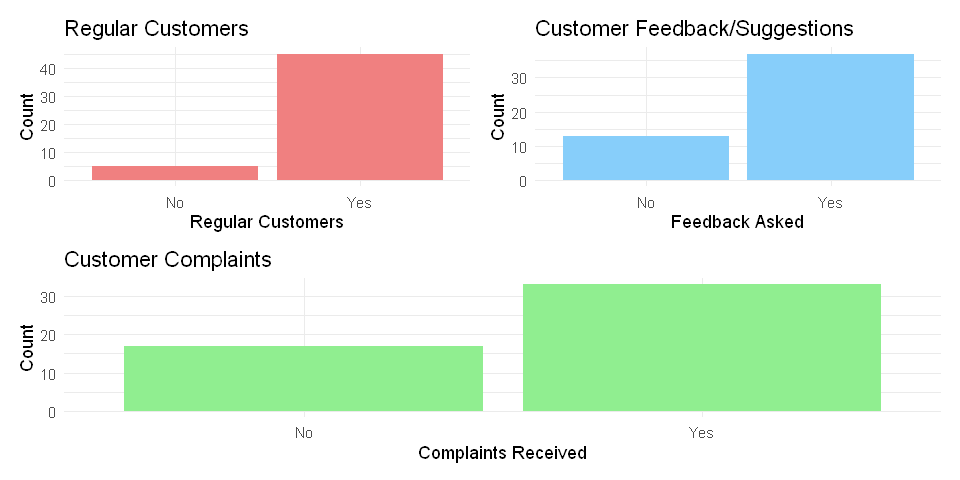

In [81]:
(q83 | q84) / q85

In [82]:
q12


 No Yes 
 24  76 

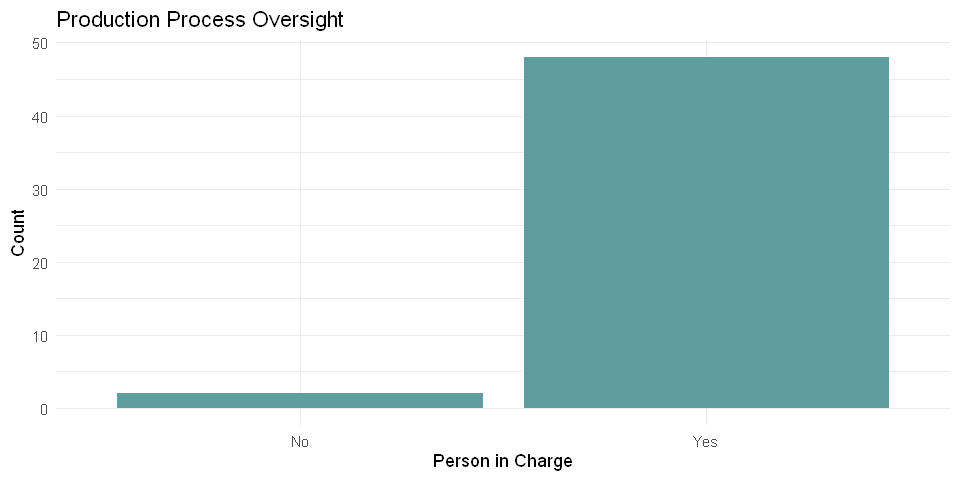

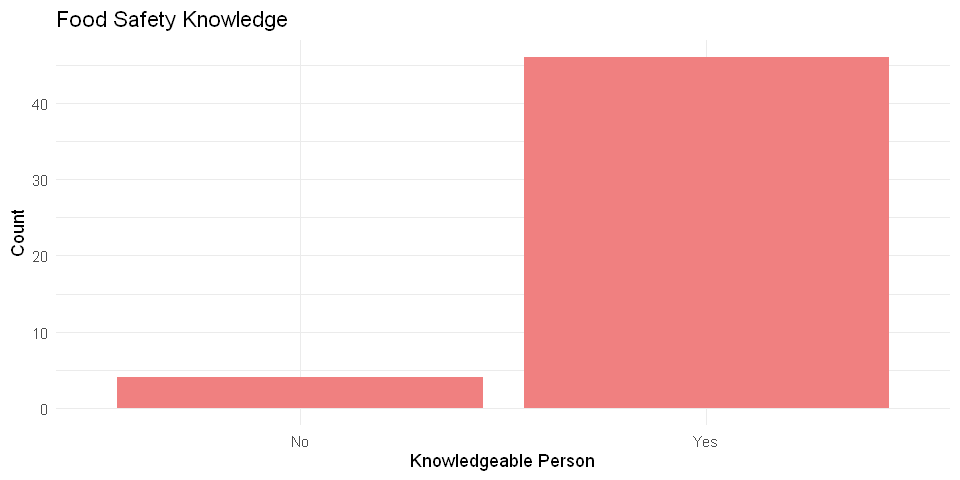

In [83]:
q81; q70

In [84]:
# contingency table for q12 and 81
q12_81_table <- table(dataactor$`12. Does your business conduct annual or periodic evaluations?`, dataactor$`83. Do you ask for feedback/suggestions from customers regarding the food you sell?`)

q12_81_table

     
      No Yes
  No   7   5
  Yes  6  32

In [85]:
# chi-squared test for independence
chisq_test_result <- chisq.test(q12_81_table)
chisq_test_result

Warning message in chisq.test(q12_81_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  q12_81_table
X-squared = 6.5108, df = 1, p-value = 0.01072


In [86]:
# table type of shop for q12 == "No" and  q83 == "No"
q12_no_q83_no_table <- table(dataactor$`Types of Shop`[dataactor$`12. Does your business conduct annual or periodic evaluations?` == "No" & dataactor$`83. Do you ask for feedback/suggestions from customers regarding the food you sell?` == "No"])
q12_no_q83_no_table


                 Bebek Garang             Kuliner Baso Tahu 
                            1                             1 
          Leker Crepes Family                 Merhaba Kebab 
                            1                             1 
             Warung Al Hikmah          Warung Lotek Bu Esih 
                            1                             1 
Warung Makan "Gudeg Pas Enak" 
                            1 

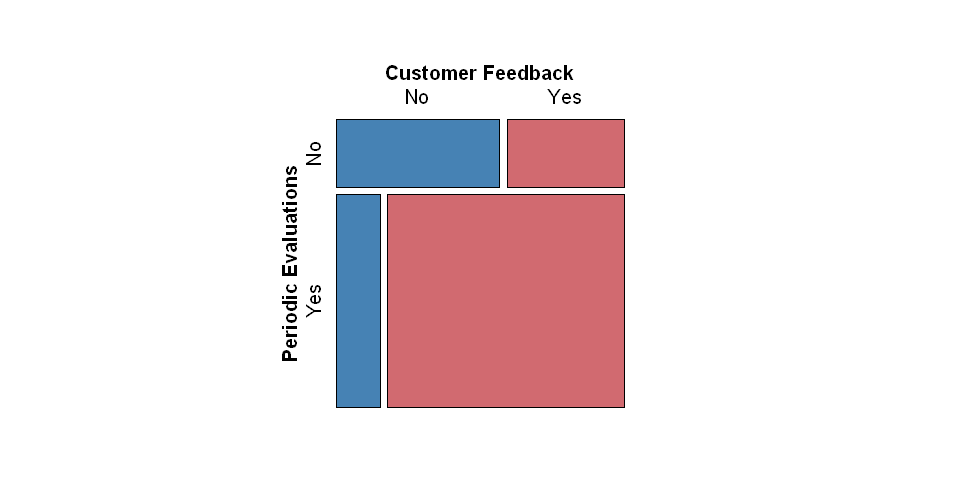

In [103]:
# Make sure vcd package is loaded
if (!require(vcd)) install.packages("vcd"); library(vcd)

# Create a contingency table for q12 and q83
contingency_table <- table(
    dataactor$`12. Does your business conduct annual or periodic evaluations?`,
    dataactor$`83. Do you ask for feedback/suggestions from customers regarding the food you sell?`
)

# Add explicit row and column names
dimnames(contingency_table) <- list(
    "Periodic Evaluations" = c("No", "Yes"),
    "Customer Feedback" = c("No", "Yes")
)
write.csv(contingency_table, "data/slides10a.csv")
# Create the mosaic plot
mosaic(contingency_table, 
       shade=TRUE, 
       colorize=TRUE,
       gp=gpar(fill=c("steelblue", "steelblue", "#d16a70", "#d16a70")),
       legend=FALSE, 
       main="",
       xlab="Business Evaluations",
       ylab="Customer Feedback")


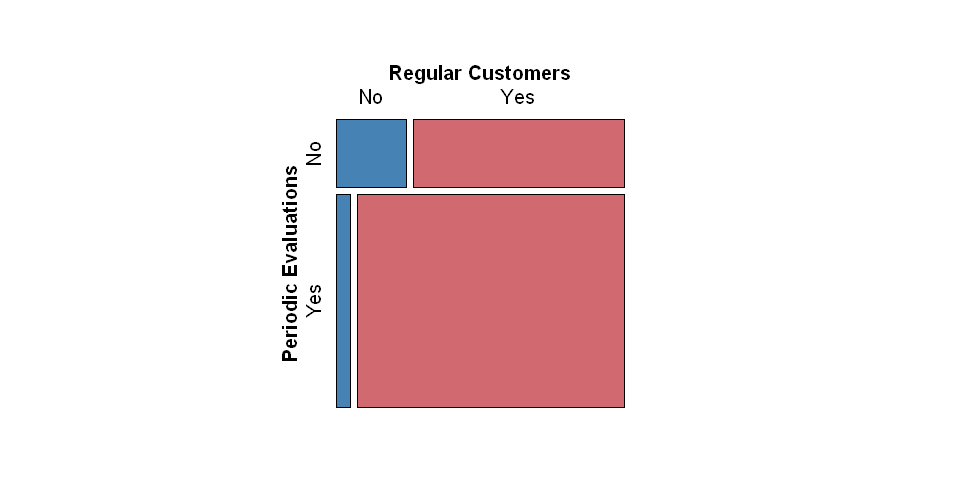

In [88]:
# Make sure vcd package is loaded
if (!require(vcd)) install.packages("vcd"); library(vcd)

# Create a contingency table for q12 and q82
contingency_table <- table(
    dataactor$`12. Does your business conduct annual or periodic evaluations?`,
    dataactor$`82. Does your shop have regular customers?`
)

# Add explicit row and column names
dimnames(contingency_table) <- list(
    "Periodic Evaluations" = c("No", "Yes"),
    "Regular Customers" = c("No", "Yes")
)
write.csv(contingency_table, "data/slides10b.csv", row.names = TRUE)
# Create the mosaic plot
mosaic(contingency_table, 
       shade=TRUE, 
       colorize=TRUE,
       gp=gpar(fill=c("steelblue", "steelblue", "#d16a70", "#d16a70")),
       legend=FALSE, 
       main="",
       xlab="Business Evaluations",
       ylab="Regular Customers")


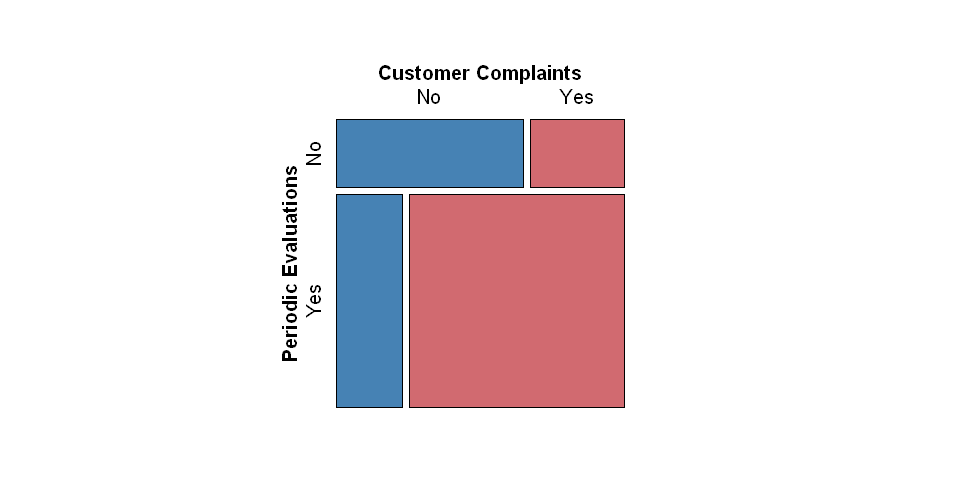

In [89]:
# Make sure vcd package is loaded
if (!require(vcd)) install.packages("vcd"); library(vcd)

# Create a contingency table for q12 and q84
contingency_table <- table(
    dataactor$`12. Does your business conduct annual or periodic evaluations?`,
    dataactor$`84. Have you ever received complaints from customers regarding the food you sell?`
)

# Add explicit row and column names
dimnames(contingency_table) <- list(
    "Periodic Evaluations" = c("No", "Yes"),
    "Customer Complaints" = c("No", "Yes")
)

write.csv(contingency_table, "data/slides10c.csv", row.names = TRUE)
# Create the mosaic plot
mosaic(contingency_table, 
       shade=TRUE, 
       colorize=TRUE,
       gp=gpar(fill=c("steelblue", "steelblue", "#d16a70", "#d16a70")),
       legend=FALSE, 
       main="",
       xlab="Business Evaluations",
       ylab="Customer Complaints")


In [90]:
# chi-squared test for independence q12 vs q82,  q12 vs q83, and q12 vs q84 
chisq_test_q12_q82 <- chisq.test(table(dataactor$`12. Does your business conduct annual or periodic evaluations?`, dataactor$`82. Does your shop have regular customers?`))
chisq_test_q12_q83 <- chisq.test(table(dataactor$`12. Does your business conduct annual or periodic evaluations?`, dataactor$`83. Do you ask for feedback/suggestions from customers regarding the food you sell?`))
chisq_test_q12_q84 <- chisq.test(table(dataactor$`12. Does your business conduct annual or periodic evaluations?`, dataactor$`84. Have you ever received complaints from customers regarding the food you sell?`))  
chisq_test_q12_q82
chisq_test_q12_q83
chisq_test_q12_q84

Warning message in chisq.test(table(dataactor$`12. Does your business conduct annual or periodic evaluations?`, :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(dataactor$`12. Does your business conduct annual or periodic evaluations?`, :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(dataactor$`12. Does your business conduct annual or periodic evaluations?`, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(dataactor$`12. Does your business conduct annual or periodic evaluations?`,     dataactor$`82. Does your shop have regular customers?`)
X-squared = 2.059, df = 1, p-value = 0.1513



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(dataactor$`12. Does your business conduct annual or periodic evaluations?`,     dataactor$`83. Do you ask for feedback/suggestions from customers regarding the food you sell?`)
X-squared = 6.5108, df = 1, p-value = 0.01072



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(dataactor$`12. Does your business conduct annual or periodic evaluations?`,     dataactor$`84. Have you ever received complaints from customers regarding the food you sell?`)
X-squared = 5.7152, df = 1, p-value = 0.01682


In [91]:
# popr  table for q12
q12_table <- table(dataactor$`12. Does your business conduct annual or periodic evaluations?`)
prop.table(q12_table)


  No  Yes 
0.24 0.76 

In [92]:
library(readxl)
data <- read_excel("data/regulator.xlsx")
colnames(data)

[1] "Timestamp"                                                                                                                                           
 [2] "Name"                                                                                                                                                
 [3] "Institution"                                                                                                                                         
 [4] "Position"                                                                                                                                            
 [5] "Department"                                                                                                                                          
 [6] "Location/Address"                                                                                                                                    
 [7] "City"                                                                                                                                                
 [8] "Province"                                                                                                                                            
 [9] "Phone number/Email"                                                                                                                                  
[10] "Time of Employment (Year and Month)"                                                                                                                 
[11] "1. Are there any regulations regarding the supervision of MSMEs and street food businesses in local?"                                                
[12] "If yes, please list"                                                                                                                                 
[13] "2. Which institution/agency has the authority to supervise MSMEs and street food businesses?"                                                        
[14] "3. Is it mandatory for every MSME and street food business to have a permit or registration?"                                                        
[15] "4. Does the institution/agency have a business registration permit service for MSMEs and food street?"                                               
[16] "5. Are there systems, mechanisms and procedures for granting permits to MSMEs and food street?"                                                      
[17] "6. Does the institution/agency have a complaint service regarding licensing of food business registration certificates for MSMEs and street vendors?"
[18] "7. How long does it take to complete a business registration permit for MSMEs and street vendors?"                                                   
[19] "8. How much does it cost to register a business license for MSMEs and street vendors?"                                                               
[20] "9. Does the Institution/Agency have a supervision plan for MSMEs and street food businesses?"                                                        
[21] "10. Does the Institution/Agency carry out routine and scheduled supervision of MSMEs and street food businesses?"                                    
[22] "11. Does the institution/agency monitor expired products in MSMEs and street vendors in your area?"                                                  
[23] "12. Does the institution/agency undergo test on contaminated food and feed materials for traceability purposes?"                                     
[24] "13. How does the institution/agency supervise or evaluate the compliance on regulation by MSMEs and street food businesses?"                         
[25] "If the answer to the previous question (Question 13) is \"Other\", please specify"                                                                   
[26] "14. In the compliance evaluation on MSMEs and street food vendors, what issues that often fail 

In [93]:
# table and definitions for reglator legaloty 
legallabel <- c("Q1", "Q3", "Q4", "Q5", "Q6", "Q8")
definition <- c(
    "Existence of local regulations for MSME/street food supervision",
    "Permit or registration requirement for MSMEs/street food",
    "Availability of business registration permit service",
    "Systems/procedures for granting permits",
    "Complaint service for business registration certificates",
    "Cost to register a business license"
)
regulator_data <- data.frame(
    Question = legallabel,
    Definition = definition
)   
regulator_data

Question,Definition
<chr>,<chr>
Q1,Existence of local regulations for MSME/street food supervision
Q3,Permit or registration requirement for MSMEs/street food
Q4,Availability of business registration permit service
Q5,Systems/procedures for granting permits
Q6,Complaint service for business registration certificates
Q8,Cost to register a business license


In [94]:
# calculate the percentage of 'Yes' responses for each question
q1 <- prop.table(table(data$`1. Are there any regulations regarding the supervision of MSMEs and street food businesses in local?`))*100
q3 <- prop.table(table(data$`3. Is it mandatory for every MSME and street food business to have a permit or registration?`))*100
q4 <- prop.table(table(data$`4. Does the institution/agency have a business registration permit service for MSMEs and food street?`))*100
q5 <- prop.table(table(data$`5. Are there systems, mechanisms and procedures for granting permits to MSMEs and food street?`))*100
q6 <- prop.table(table(data$`6. Does the institution/agency have a complaint service regarding licensing of food business registration certificates for MSMEs and street vendors?`))*100
q8 <- prop.table(table(data$`8. How much does it cost to register a business license for MSMEs and street vendors?`))*100   

regulator_perf <- data.frame(
    Question = legallabel,
    Performance = c(q1[2], q3[2], q4[2], q5[1], q6[2], q8[2])
)
regulator_perf

Question,Performance
<chr>,<dbl>
Q1,88.88889
Q3,77.77778
Q4,88.88889
Q5,100.00000
Q6,87.50000
Q8,50.00000


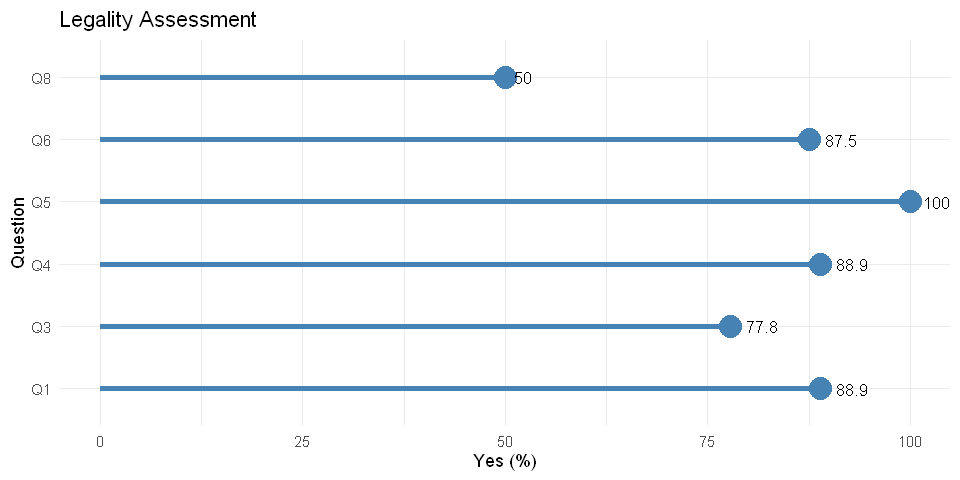

In [104]:
# plot for regulator_perf ordered by alphabet Q
library(ggplot2)

write.csv(regulator_perf, "data/slides11.csv", row.names = FALSE)

regulator_perf$Color <- ifelse(regulator_perf$Performance < 50, "tomato", "steelblue")

ggplot(regulator_perf, aes(y = factor(Question, levels = sort(unique(Question))), x = Performance)) +
     geom_segment(aes(x = 0, xend = Performance, y = Question, yend = Question, color = Color), size = 1.5) +
     geom_point(aes(color = Color), size = 6) +
     scale_color_identity() +
     labs(title = "Legality Assessment",
           y = "Question",
           x = "Yes (%)") +
     geom_text(aes(label = round(Performance, 1)), hjust = -0.5, size = 3.5) +
     xlim(0, 100) +
     theme_minimal()


Warning message in tm_map.SimpleCorpus(corpus_q14, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_q14, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_q14, removeWords, stopwords("english")):
"transformation drops documents"


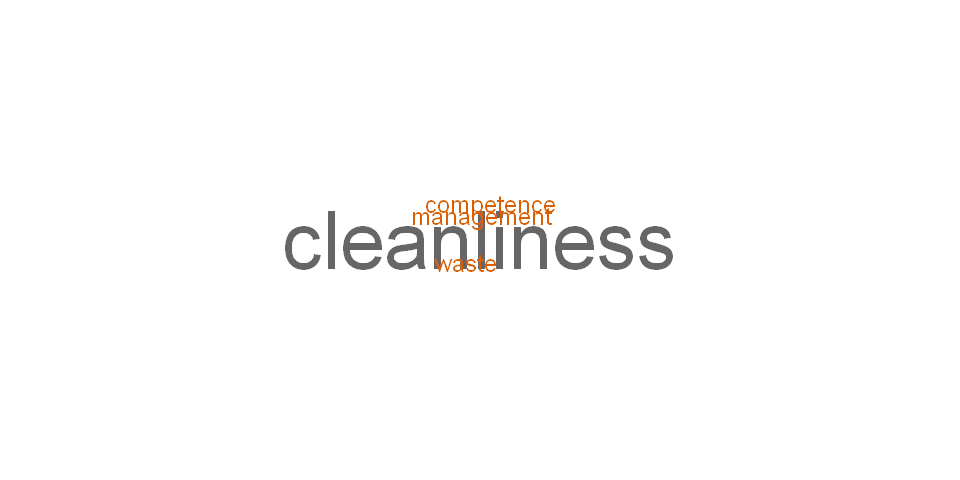

In [105]:
# word cloud for q14 (all horizontal)
library(wordcloud)
library(tm)
library(RColorBrewer)

q14_responses <- na.omit(data$`14. In the compliance evaluation on MSMEs and street food vendors, what issues that often fail to meet the requirements?`)
corpus_q14 <- Corpus(VectorSource(q14_responses))
corpus_q14 <- tm_map(corpus_q14, content_transformer(tolower))
corpus_q14 <- tm_map(corpus_q14, removePunctuation)
corpus_q14 <- tm_map(corpus_q14, removeWords, stopwords("english"))

tdm_q14 <- TermDocumentMatrix(corpus_q14)
m_q14 <- as.matrix(tdm_q14)
v_q14 <- sort(rowSums(m_q14), decreasing=TRUE)
d_q14 <- data.frame(word=names(v_q14), freq=v_q14)

write.csv(d_q14, "data/slides12.csv", row.names = FALSE)

set.seed(1234)
wordcloud(
    words = d_q14$word,
    freq = d_q14$freq,
    min.freq = 1,
    max.words = 50,
    random.order = FALSE,
    rot.per = 0, # All horizontal
    colors = brewer.pal(8, "Dark2")
)


In [97]:
data$`9. Does the Institution/Agency have a supervision plan for MSMEs and street food businesses?`
data$`10. Does the Institution/Agency carry out routine and scheduled supervision of MSMEs and street food businesses?`
data$`11. Does the institution/agency monitor expired products in MSMEs and street vendors in your area?`
data$`12. Does the institution/agency undergo test on contaminated food and feed materials for traceability purposes?`

# table and definitions for reglator supervision
supervision_labels <- c("Q9", "Q10", "Q11", "Q12")
supervision_definition <- c(
    "Existence of supervision plan for MSMEs/street food",
    "Routine and scheduled supervision of MSMEs/street food",
    "Monitoring of expired products in MSMEs/street vendors",
    "Testing of contaminated food/feed materials for traceability"
)
regulator_supervision_data <- data.frame(
    Question = supervision_labels,
    Definition = supervision_definition
)
regulator_supervision_data


[1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" NA    NA

[1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" NA    "Yes" NA

[1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" NA    NA

[1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" NA    NA

Question,Definition
<chr>,<chr>
Q9,Existence of supervision plan for MSMEs/street food
Q10,Routine and scheduled supervision of MSMEs/street food
Q11,Monitoring of expired products in MSMEs/street vendors
Q12,Testing of contaminated food/feed materials for traceability


Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."


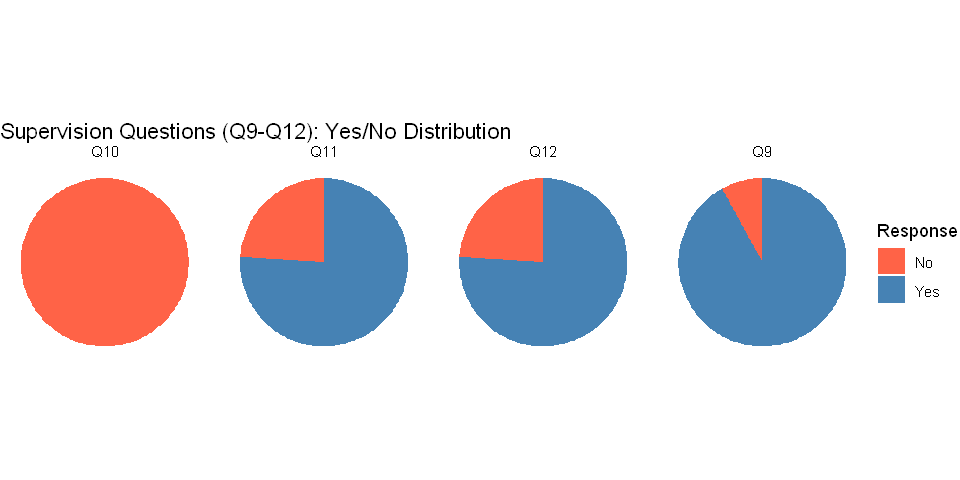

In [98]:
# Pie charts for each supervision question Q9-Q12
library(ggplot2)

# Prepare data for pie charts
pie_data <- data.frame(
    Question = rep(c("Q9", "Q10", "Q11", "Q12"), each = 2),
    Response = rep(c("No", "Yes"), times = 4),
    Percentage = c(
        as.numeric(q9[1]), as.numeric(q9[2]),
        as.numeric(q10[1]), as.numeric(q10[2]),
        as.numeric(q11[1]), as.numeric(q11[2]),
        as.numeric(q12[1]), as.numeric(q12[2])
    )
)

# Plot pie charts using facet_wrap
ggplot(pie_data, aes(x = "", y = Percentage, fill = Response)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y") +
    facet_wrap(~ Question, nrow = 1) +
    labs(title = "Supervision Questions (Q9-Q12): Yes/No Distribution") +
    theme_void() +
    scale_fill_manual(values = c("Yes" = "steelblue", "No" = "tomato"))

In [99]:
data$`15. Have there ever been cases of poisoning in your area?`


[1] "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" NA    NA

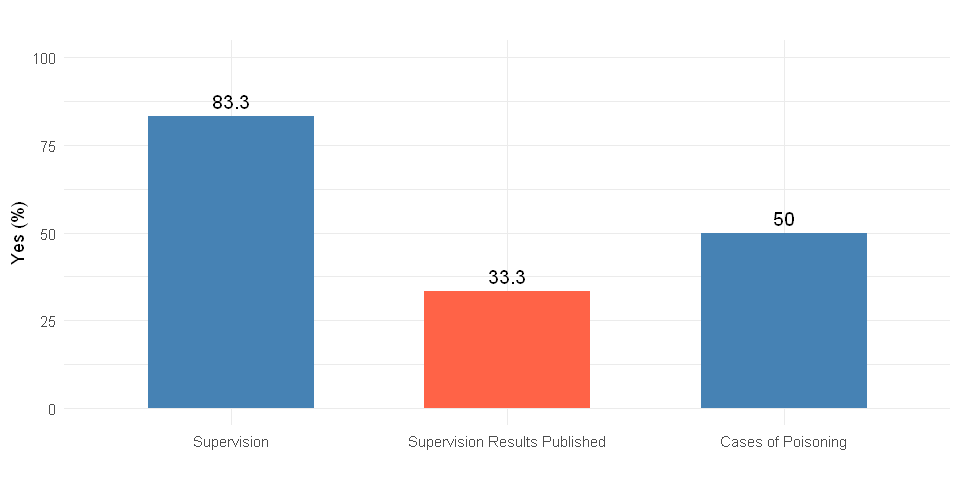

In [106]:
library(ggplot2)
library(dplyr)

# Remove NA values for all three questions
data_clean <- data %>%
    filter(
        !is.na(`12. Does the institution/agency undergo test on contaminated food and feed materials for traceability purposes?`),
        !is.na(`17. Are the results of supervision on MSMEs and street food businesses published?`),
        !is.na(`15. Have there ever been cases of poisoning in your area?`)
    )

# Calculate proportion of "Yes" for each question
prop_yes <- data.frame(
    Question = c("Supervision", "Supervision Results Published", "Cases of Poisoning"),
    Proportion = c(
        mean(data_clean$`12. Does the institution/agency undergo test on contaminated food and feed materials for traceability purposes?` == "Yes") * 100,
        mean(data_clean$`17. Are the results of supervision on MSMEs and street food businesses published?` == "Yes") * 100,
        mean(data_clean$`15. Have there ever been cases of poisoning in your area?` == "Yes") * 100
    )
)

# Reorder factor levels as requested: upservis (Supervision), result (Supervision Results Published), poison (Cases of Poisoning)
prop_yes$Question <- factor(prop_yes$Question, levels = c("Supervision", "Supervision Results Published", "Cases of Poisoning"))

write.csv(prop_yes, "data/slides12a.csv", row.names = FALSE)

# Bar plot of "Yes" proportions
ggplot(prop_yes, aes(x = Question, y = Proportion, fill = Question)) +
    geom_bar(stat = "identity", width = 0.6) +
    geom_text(aes(label = round(Proportion, 1)), vjust = -0.5, size = 4) +
    scale_fill_manual(values = c(
        "Supervision" = "steelblue",
        "Supervision Results Published" = "tomato",
        "Cases of Poisoning" = "steelblue"
    )) +
    ylim(0, 100) +
    labs(title = "", x = "", y = "Yes (%)") +
    theme_minimal() +
    theme(legend.position = "none")

In [101]:
data$`18. Does the institution/agency provide training for MSMEs and street food businesses?`
data$`19. Does the Institution/Agency provide training related to food safety to MSME and street food entrepreneurs?`
data$`20. Has the Institution/Agency ever received consumer complaints regarding street food vendors?`
data$`22. Does the institution/agency have a program related to improving food safety in your work area that you can share?`


[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" NA    NA    NA

[1] "Yes" "Yes" "No"  "No"  "Yes" "Yes" NA    NA    "Yes"

[1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" NA    NA    NA

[1] "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" NA    NA

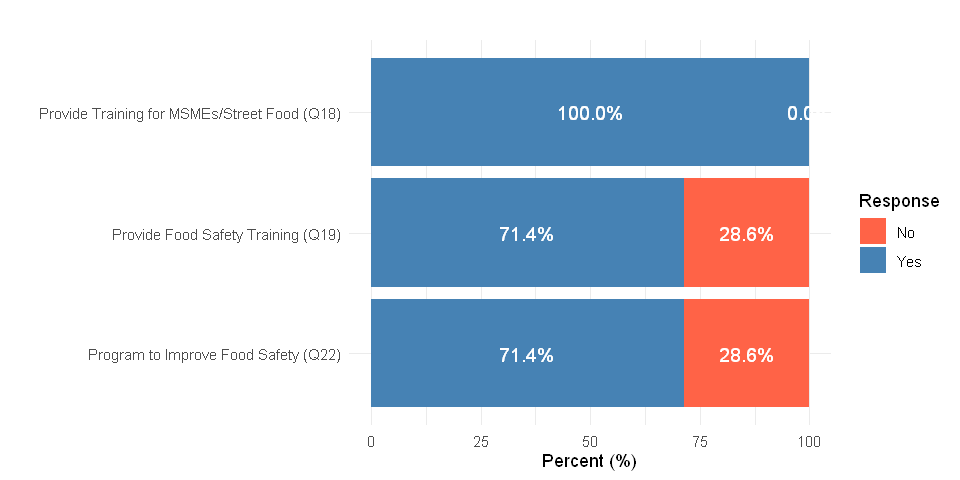

In [107]:
# Generate horizontal proportion bar plots for Q18, Q19, Q22 (Q20 removed)
library(ggplot2)
library(dplyr)
library(tidyr)

# Prepare data for plotting (proportions)
plot_data <- data.frame(
    Question = c(
        "Provide Training for MSMEs/Street Food (Q18)",
        "Provide Food Safety Training (Q19)",
        "Program to Improve Food Safety (Q22)"
    ),
    Yes = c(
        mean(data$`18. Does the institution/agency provide training for MSMEs and street food businesses?` == "Yes", na.rm = TRUE) * 100,
        mean(data$`19. Does the Institution/Agency provide training related to food safety to MSME and street food entrepreneurs?` == "Yes", na.rm = TRUE) * 100,
        mean(data$`22. Does the institution/agency have a program related to improving food safety in your work area that you can share?` == "Yes", na.rm = TRUE) * 100
    ),
    No = c(
        mean(data$`18. Does the institution/agency provide training for MSMEs and street food businesses?` == "No", na.rm = TRUE) * 100,
        mean(data$`19. Does the Institution/Agency provide training related to food safety to MSME and street food entrepreneurs?` == "No", na.rm = TRUE) * 100,
        mean(data$`22. Does the institution/agency have a program related to improving food safety in your work area that you can share?` == "No", na.rm = TRUE) * 100
    )
)

# Convert to long format for ggplot
plot_data_long <- plot_data %>%
    pivot_longer(cols = c("Yes", "No"), names_to = "Response", values_to = "Percent")

write.csv(plot_data_long, "data/slides13.csv", row.names = FALSE)

# Horizontal proportion bar plot
ggplot(plot_data_long, aes(x = Percent, y = Question, fill = Response)) +
    geom_bar(stat = "identity", position = "stack") +
    geom_text(aes(label = sprintf("%.1f%%", Percent)), position = position_stack(vjust = 0.5), color = "white", size = 4) +
    scale_fill_manual(values = c("Yes" = "steelblue", "No" = "tomato")) +
    labs(title = "",
         x = "Percent (%)", y = "", fill = "Response") +
    theme_minimal() +
    theme(axis.text.y = element_text(angle = 0, hjust = 1))
